# Project Outline: 2019 Crime and Weather Info

[Back to Outline](#Project-Outline:-2019-Crime-and-Weather-Info)

## 1. Importing Libraries and Setting Preferences
[Back to Outline](#Project-Outline:-2019-Crime-and-Weather-Info)

In [669]:
# Libraries go here, yay!
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from datetime import datetime
from dateutil.parser import parse
import os

In [670]:
# Setting default number of decimal places for this notebook!
pd.set_option('precision', 0)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [671]:
# Setting our plotting preferences
sns.set(style = 'whitegrid', font_scale = 1.5)


In [672]:
os.getcwd()

'C:\\Users\\gothv\\Jupyter\\final_capstone'

## 2. Importing 2019 Crime Data and EDA
[Back to Outline](#Project-Outline:-2019-Crime-and-Weather-Info)

### 2.1: Importing Our Crime Data
[Back to Outline](#Project-Outline:-2019-Crime-and-Weather-Info)

In [673]:
# Importing 2019 DPD crime data
crime = pd.read_csv('dpd_2019 data.csv', low_memory = False)

In [674]:
# What does our data look like on import?
crime.head()

,Incident Number w/year,Year of Incident,Service Number ID,Watch,Call (911) Problem,Type of Incident,Type Location,Type of Property,Incident Address,Apartment Number,Reporting Area,Beat,Division,Sector,Council District,Target Area Action Grids,Community,Date1 of Occurrence,Year1 of Occurrence,Month1 of Occurence,Day1 of the Week,Time1 of Occurrence,Day1 of the Year,Date2 of Occurrence,Year2 of Occurrence,Month2 of Occurence,Day2 of the Week,Time2 of Occurrence,Day2 of the Year,Date of Report,Date incident created,Offense Entered Year,Offense Entered Month,Offense Entered Day of the Week,Offense Entered Time,Offense Entered Date/Time,CFS Number,Call Received Date Time,Call Date Time,Call Cleared Date Time,Call Dispatch Date Time,Special Report (Pre-RMS),Person Involvement Type,Victim Type,Victim Name,Victim Race,Victim Ethnicity,Victim Gender,Victim Age,Victim Age at Offense,Victim Home Address,Victim Apartment,Victim Zip Code,Victim City,Victim State,Victim Business Name,Victim Business Address,Victim Business Phone,Responding Officer #1 Badge No,Responding Officer #1 Name,Responding Officer #2 Badge No,Responding Officer #2 Name,Reporting Officer Badge No,Assisting Officer Badge No,Reviewing Officer Badge No,Element Number Assigned,Investigating Unit 1,Investigating Unit 2,Offense Status,UCR Disposition,Victim Injury Description,Victim Condition,Modus Operandi (MO),Family Offense,Hate Crime,Hate Crime Description,Weapon Used,Gang Related Offense,Victim Package,Drug Related Istevencident,RMS Code,Criminal Justice Information Service Code,Penal Code,UCR Offense Name,UCR Offense Description,UCR Code,Offense Type,NIBRS Crime,NIBRS Crime Category,NIBRS Crime Against,NIBRS Code,NIBRS Group,NIBRS Type,Update Date,X Coordinate,Y Cordinate,Zip Code,City,State,Location1
0,182607-2019,2019,182607-2019-02,3,55 - TRAFFIC STOP,WARRANT-DALLAS PD (ALIAS/CAPIAS),"Highway, Street, Alley ETC",NaN,3628 WENDELKIN ST,NaN,2162,345,SOUTHEAST,34,D7,JuliusSchepps Central,NaN,09/07/2019,2019,September,Sat,22:59,250,09/07/2019,2019,September,Sat,23:18,250,09/08/2019 12:44:00 AM,09/07/2019 11:39:01 PM,2019,September,Sat,23:39,250,19-1690051,09/07/2019 10:59:41 PM,09/07/2019 10:59:41 PM,09/08/2019 07:16:08 AM,09/07/2019 10:59:49 PM,NaN,Victim,Society/Public,CITY OF DALLAS,NaN,NaN,NaN,NaN,NaN,725 N JIM MILLER RD,NaN,75217,DALLAS,TX,NaN,NaN,NaN,11489,"CARTER,IAN,ALEXANDER",11413,"TUCKER,LOGAN,JAMES",11489,NaN,120430,C341,NaN,NaN,Clear by Arrest,CBA (Over Age 17),NaN,NaN,AP HAD WARRANTS OUT OF CITY OF DALLAS,False,NaN,None,NaN,NaN,NaN,No,NC-99999999-NC184,99999999,Warrant Alias/Capias,NaN,NaN,NaN,NaN,MISCELLANEOUS,MISCELLANEOUS,MISCELLANEOUS,999,C,No Coded,2019-10-05 12:58:52.0000000,3e+06,7e+06,75215,DALLAS,TX,"3628 WENDELKIN ST\nDALLAS, TX 75215\n(32.75741..."
1,190226-2019,2019,190226-2019-01,3,58 - ROUTINE INVESTIGATION,DWI 2 OR MORE PREV CONV,"Highway, Street, Alley ETC",NaN,7000 C F HAWN SERV WB,NaN,2197,331,SOUTHEAST,33,D5,NaN,NaN,09/18/2019,2019,September,Wed,19:00,261,09/18/2019,2019,September,Wed,19:20,261,09/18/2019 07:21:00 PM,09/18/2019 07:50:51 PM,2019,September,Wed,19:50,261,19-1764567,09/18/2019 07:21:13 PM,09/18/2019 07:21:13 PM,09/19/2019 03:50:07 AM,09/18/2019 07:21:13 PM,NaN,Victim,Society/Public,CITY OF DALLAS,NaN,NaN,NaN,NaN,NaN,725 N JIM MILLER RD,NaN,75217,DALLAS,TX,NaN,NaN,NaN,11554,"NERIO,BRYAN,ALBERTO",NaN,NaN,11554,NaN,118185,C324,NaN,NaN,Clear by Arrest,CBA (Over Age 17),NaN,NaN,AP WAS OPERATING A MOTOR VEHICLE WHILE INTOXIC...,False,NaN,None,NaN,NaN,NaN,No,F3-54040011-R3,54040011,PC 49.09(b),NaN,NaN,NaN,NaN,DUI,DRIVING UNDER THE INFLUENCE,SOCIETY,90D,B,No Coded,2019-09-19 03:20:36.0000000,3e+06,7e+06,75217,DALLAS,TX,"7000 C F HAWN SERV WB\nDALLAS, TX 75217"
2,208483-2019,2019,208483-2019-01,2,6XE - DISTURBANCE EMERGENCY,FOUND PROPERTY (NO OFFENSE),"Highway, Street, Alley ETC",NaN,2200 EUGENE ST,NaN,2172,345,SOUTHEAST,34,D7,NaN,NaN,10/13/2019,2019,October,Sun,10:00,286,10/13/2019,2019,October,Sun,10:05,286,10/13/2019 10:08:00 AM,

In [675]:
# Making column names easier to manage/consistant
crime.columns = crime.columns.str.replace(' ', '_')
crime.columns = crime.columns.str.lower()

In [676]:
# Getting rid of columns to match original data
crime.drop(['incident_number_w/year', 'year_of_incident', 'service_number_id','watch', 'type__location','type_of_property',
         'apartment_number', 'reporting_area', 'beat','target_area_action_grids', 'community', 'date2_of_occurrence_', 
         'year2_of_occurrence', 'month2_of_occurence', 'day2_of_the_week','time2_of_occurrence', 'day2_of_the_year',
         'date_of_report','date_incident_created', 'offense_entered_year','offense_entered_month', 'offense_entered_day_of_the_week',
         'offense_entered_time', 'offense_entered__date/time', 'cfs_number','call_received_date_time', 'call_date_time',
         'call_cleared_date_time','call_dispatch_date_time', 'special_report_(pre-rms)','person_involvement_type', 
         'victim_name', 'victim_age_at_offense', 'victim_home_address', 'victim_apartment','victim_zip_code', 'victim_city',
         'victim_state', 'victim_business_name', 'victim_business_address', 'victim_business_phone', 'reporting_officer_badge_no',
         'assisting_officer_badge_no', 'reviewing_officer_badge_no','element_number_assigned', 'investigating_unit_1','investigating_unit_2',
         'offense_status', 'ucr_disposition','victim_injury_description', 'victim_condition', 'modus_operandi_(mo)','family_offense',
         'hate_crime', 'hate_crime_description', 'weapon_used','gang_related_offense', 'victim_package', 'drug_related_istevencident',
         'rms_code', 'criminal_justice_information_service_code', 'penal_code','ucr_offense_name', 'ucr_offense_description',
         '_ucr_code','offense_type', 'nibrs_crime', 'nibrs_crime_against', 'nibrs_code', 'nibrs_group', 'nibrs_type','update_date', 
         'city','state', 'location1', 'incident_address'], axis = 1, inplace = True)

In [677]:
# Let's clean up the names of the remaining columns even further!
crime.rename( columns = {'call_(911)_problem':'911_call_type','date1_of_occurrence':'date_of_occurrence', 
                      'year1_of_occurrence': 'year_of_occurrence', 'month1_of_occurence': 'month_of_occurrence',
                    'time1_of_occurrence': 'time_of_occurrence', 'day1_of_the_year': 'day_of_the_year' }, inplace= True)

In [678]:
# Sanity check: does everything look like we expect?
crime.head()

,911_call_type,type_of_incident,division,sector,council_district,date_of_occurrence,year_of_occurrence,month_of_occurrence,day1_of_the_week,time_of_occurrence,day_of_the_year,victim_type,victim_race,victim_ethnicity,victim_gender,victim_age,responding_officer_#1__badge_no,responding_officer_#1__name,responding_officer_#2_badge_no,responding_officer_#2__name,nibrs_crime_category,x_coordinate,y_cordinate,zip_code
0,55 - TRAFFIC STOP,WARRANT-DALLAS PD (ALIAS/CAPIAS),SOUTHEAST,34,D7,09/07/2019,2019,September,Sat,22:59,250,Society/Public,NaN,NaN,NaN,NaN,11489,"CARTER,IAN,ALEXANDER",11413,"TUCKER,LOGAN,JAMES",MISCELLANEOUS,3e+06,7e+06,75215
1,58 - ROUTINE INVESTIGATION,DWI 2 OR MORE PREV CONV,SOUTHEAST,33,D5,09/18/2019,2019,September,Wed,19:00,261,Society/Public,NaN,NaN,NaN,NaN,11554,"NERIO,BRYAN,ALBERTO",NaN,NaN,DRIVING UNDER THE INFLUENCE,3e+06,7e+06,75217
2,6XE - DISTURBANCE EMERGENCY,FOUND PROPERTY (NO OFFENSE),SOUTHEAST,34,D7,10/13/2019,2019,October,Sun,10:00,286,Society/Public,NaN,NaN,NaN,NaN,8973,"CRANK,SHARICE",8948,"BROWN,BRYSON,FRITZGERALD",MISCELLANEOUS,3e+06,7e+06,75215
3,7X - MAJOR ACCIDENT,ABANDONED PROPERTY (NO OFFENSE),SOUTHEAST,34,D7,08/14/2019,2019,August,Wed,22:58,226,Society/Public,NaN,NaN,NaN,NaN,10189,"LOOKENBILL,DAMIEN,CHARLES",9074,"PULLIAM,JEREMY,DEAN",MISCELLANEOUS,3e+06,7e+06,75217
4,6XE - DISTURBANCE EMERGENCY,"CRIM MISCHIEF > OR EQUAL $2,500 < $30K",NORTHWEST,55,D13,10/25/2019,2019,October,Fri,19:00,298,Individual,White,Non-Hispanic or Latino,Male,34,11422,"VAUGHAN,AUSTIN,JAMES",NaN,NaN,DESTRUCTION/ DAMAGE/ VANDALISM OF PROPERTY,2e+06,7e+06,75229


### 2.2: Dealing with Null Values
[Back to Outline](#Project-Outline:-2019-Crime-and-Weather-Info)

In [679]:
# What, if any, null values do we have in our crime data?
crime.isnull().sum().sort_values(ascending = False)

responding_officer_#2__name        76929
responding_officer_#2_badge_no     76929
victim_age                         70038
victim_ethnicity                   66369
victim_race                        66290
victim_gender                      66268
responding_officer_#1__name         5206
responding_officer_#1__badge_no     5206
911_call_type                       4628
victim_type                         3960
council_district                     513
zip_code                             477
x_coordinate                         464
y_cordinate                          464
division                             129
sector                                68
day_of_the_year                        1
time_of_occurrence                     1
day1_of_the_week                       1
month_of_occurrence                    1
year_of_occurrence                     1
date_of_occurrence                     1
nibrs_crime_category                   0
type_of_incident                       0
dtype: int64

Specific features above, such as anything regarding our 2nd reporting officer, are totally fine as null values. Other features, such as anything related to time or victim, are not ok as null values. We will take a closer look at these next!

In [680]:
# How many records do we have in our dataset?
len(crime)

131700

In [681]:
crime.columns

Index(['911_call_type', 'type_of_incident', 'division', 'sector',
       'council_district', 'date_of_occurrence', 'year_of_occurrence',
       'month_of_occurrence', 'day1_of_the_week', 'time_of_occurrence',
       'day_of_the_year', 'victim_type', 'victim_race', 'victim_ethnicity',
       'victim_gender', 'victim_age', 'responding_officer_#1__badge_no',
       'responding_officer_#1__name', 'responding_officer_#2_badge_no',
       'responding_officer_#2__name', 'nibrs_crime_category', 'x_coordinate',
       'y_cordinate', 'zip_code'],
      dtype='object')

In [682]:
# Since we only really care about specific nulls let's make a list of the columns we care about as nulls
no_null = ['911_call_type', 'type_of_incident', 'date_of_occurrence', 'year_of_occurrence','month_of_occurrence', 
           'day1_of_the_week', 'time_of_occurrence','day_of_the_year', 'victim_type', 'victim_race', 'victim_ethnicity',
       'victim_gender', 'victim_age', 'responding_officer_#1__badge_no','responding_officer_#1__name', 'x_coordinate',
       'y_cordinate', 'zip_code']

In [683]:
# Making our life easy and dropping any and all null values, since this dataset is just going to be use as a test set
crime.dropna(subset= no_null, inplace = True)

In [684]:
# Double checking that all null values we care about are now gone
crime.isnull().sum().sort_values(ascending = False)

responding_officer_#2__name        38467
responding_officer_#2_badge_no     38467
council_district                     127
division                              10
sector                                10
zip_code                               0
day_of_the_year                        0
type_of_incident                       0
date_of_occurrence                     0
year_of_occurrence                     0
month_of_occurrence                    0
day1_of_the_week                       0
time_of_occurrence                     0
victim_type                            0
y_cordinate                            0
victim_race                            0
victim_ethnicity                       0
victim_gender                          0
victim_age                             0
responding_officer_#1__badge_no        0
responding_officer_#1__name            0
nibrs_crime_category                   0
x_coordinate                           0
911_call_type                          0
dtype: int64

Excellent! Now that we've gotten rid of our null values we can move on to the next portion of this section: dealing with our datetime values!

### 2.3: Dealing With Datetimes
[Back to Outline](#Project-Outline:-2019-Crime-and-Weather-Info)

In [685]:
# Since our final df for the other years has a 'date only' feature let's take care of that now!
crime['date_only'] = crime['date_of_occurrence'].copy()

In [686]:
# Making date only into a datetime object
crime['date_only'] = pd.to_datetime(crime['date_only'])

In [687]:
crime['date_only'].head()

4    2019-10-25
6    2019-10-29
10   2019-10-28
12   2019-09-10
16   2019-10-27
Name: date_only, dtype: datetime64[ns]

In [688]:
crime['year'] = crime['date_only'].dt.year

In [689]:
crime['year'].dtype

dtype('int64')

In [690]:
# Making some new, time-related features
crime['month'] = crime['date_only'].apply(lambda x: x.strftime('%m'))
crime['year'] = crime['date_only'].apply(lambda x: x.strftime('%Y'))
crime['day_of_year_number'] = crime['date_only'].dt.dayofyear
crime['month_year'] = crime['date_only'].apply(lambda x: x.strftime('%B-%Y'))

In [691]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58614 entries, 4 to 131693
Data columns (total 29 columns):
911_call_type                      58614 non-null object
type_of_incident                   58614 non-null object
division                           58604 non-null object
sector                             58604 non-null float64
council_district                   58487 non-null object
date_of_occurrence                 58614 non-null object
year_of_occurrence                 58614 non-null float64
month_of_occurrence                58614 non-null object
day1_of_the_week                   58614 non-null object
time_of_occurrence                 58614 non-null object
day_of_the_year                    58614 non-null float64
victim_type                        58614 non-null object
victim_race                        58614 non-null object
victim_ethnicity                   58614 non-null object
victim_gender                      58614 non-null object
victim_age                      

Now that we have a better handle on our datetime features we can move on to our next part of this section: exploratory data analysis! WOO HOO!

### 2.4: Exploratory Data Analysis and Exploring of Crimes
[Back to Outline](#Project-Outline:-2019-Crime-and-Weather-Info)

In our previous dataset we saw specific trends in our data related to time-based variables. Let's set this dataset up in the same way to analyze any trends or patterns related to time.

In [692]:
# Double checking that all of our new columns are there!
crime.head()

,911_call_type,type_of_incident,division,sector,council_district,date_of_occurrence,year_of_occurrence,month_of_occurrence,day1_of_the_week,time_of_occurrence,day_of_the_year,victim_type,victim_race,victim_ethnicity,victim_gender,victim_age,responding_officer_#1__badge_no,responding_officer_#1__name,responding_officer_#2_badge_no,responding_officer_#2__name,nibrs_crime_category,x_coordinate,y_cordinate,zip_code,date_only,year,month,day_of_year_number,month_year
4,6XE - DISTURBANCE EMERGENCY,"CRIM MISCHIEF > OR EQUAL $2,500 < $30K",NORTHWEST,55,D13,10/25/2019,2019,October,Fri,19:00,298,Individual,White,Non-Hispanic or Latino,Male,34,11422,"VAUGHAN,AUSTIN,JAMES",NaN,NaN,DESTRUCTION/ DAMAGE/ VANDALISM OF PROPERTY,2e+06,7e+06,75229,2019-10-25,2019,10,298,October-2019
6,11R - BURG OF RES,BURGLARY OF HABITATION - FORCED ENTRY,NORTHEAST,25,D10,10/29/2019,2019,October,Tue,16:00,302,Individual,Black,Non-Hispanic or Latino,Male,59,11586,"HENSON,JASON",9675,"KIMPEL,JASON,DONALD",BURGLARY/ BREAKING & ENTERING,3e+06,7e+06,75243,2019-10-29,2019,10,302,October-2019
10,09V - UUMV,UNAUTHORIZED USE OF MOTOR VEH - AUTOMOBILE,NORTHEAST,22,D9,10/28/2019,2019,October,Mon,16:59,301,Individual,Hispanic or Latino,Hispanic or Latino,Male,26,10965,"HENNINGS,FRANCO",NaN,NaN,MOTOR VEHICLE THEFT,3e+06,7e+06,75228,2019-10-28,2019,10,301,October-2019
12,11R - BURG OF RES,BURGLARY OF HABITATION -NO FORCED ENTRY,NORTH CENTRAL,63,D11,09/10/2019,2019,September,Tue,04:10,253,Individual,White,Non-Hispanic or Latino,Male,67,10729,"JOSE,JEFFRIN",NaN,NaN,BURGLARY/ BREAKING & ENTERING,2e+06,7e+06,75254,2019-09-10,2019,09,253,September-2019
16,09V - UUMV,UNAUTHORIZED USE OF MOTOR VEH - TRUCK OR BUS,SOUTHWEST,44,D1,10/27/2019,2019,October,Sun,14:00,300,Individual,Hispanic or Latino,Hispanic or Latino,Male,45,10519,"ODHIAMBO,CATHY",8748,"SMOLA,RYAN,JOSEPH",MOTOR VEHICLE THEFT,2e+06,7e+06,75211,2019-10-27,2019,10,300,October-2019


Let's do our basic checks on our new crime data to make sure it is what we expect (is within the time frame, in Dallas city proper, etc.)

In [693]:
# Double checking that all of our data is in our scope of 2019
crime['year'].value_counts()

2019    57545
2018      917
2017       72
2016       22
2015       18
2014       15
2012        6
2013        5
2000        4
2010        2
2011        2
2009        1
1992        1
2002        1
1998        1
1980        1
2008        1
Name: year, dtype: int64

In [694]:
# Keeping only our 2019 info
crime  = crime.loc[crime['year'] == '2019']

In [695]:
# Sorting our dataset by date of occurrence
crime.sort_values(by = 'date_of_occurrence', inplace = True)

In [696]:
# Creating the crime count by day column
daily_count = pd.DataFrame(crime['date_only'].value_counts())

In [697]:
# Cleaning up new df
daily_count.reset_index(inplace = True)
daily_count.rename(columns = {'index':'date_only', 'date_only':'daily_crime_count'}, inplace = True)
daily_count.sort_values(by = 'date_only', inplace = True)
daily_count.head()

,date_only,daily_crime_count
2,2019-01-01,268
221,2019-01-02,174
259,2019-01-03,165
83,2019-01-04,206
68,2019-01-05,209


In [698]:
# Merging the new daily crime count with our original data
crime = pd.merge(crime, daily_count, how = 'left', on = 'date_only')

In [699]:
crime.head()

,911_call_type,type_of_incident,division,sector,council_district,date_of_occurrence,year_of_occurrence,month_of_occurrence,day1_of_the_week,time_of_occurrence,day_of_the_year,victim_type,victim_race,victim_ethnicity,victim_gender,victim_age,responding_officer_#1__badge_no,responding_officer_#1__name,responding_officer_#2_badge_no,responding_officer_#2__name,nibrs_crime_category,x_coordinate,y_cordinate,zip_code,date_only,year,month,day_of_year_number,month_year,daily_crime_count
0,58 - ROUTINE INVESTIGATION,ASSAULT -BODILY INJURY ONLY,NORTHWEST,52,D2,01/01/2019,2019,January,Tue,03:00,1,Individual,Hispanic or Latino,Hispanic or Latino,Female,33,8890,"MCDANIEL,TONYA,MARIE",NaN,NaN,ASSAULT OFFENSES,2e+06,7e+06,75247,2019-01-01,2019,01,1,January-2019,268
1,40/01 - OTHER,DOG BITE - INJURED PERSON,NORTHEAST,22,D9,01/01/2019,2019,January,Tue,12:00,1,Individual,Hispanic or Latino,Hispanic or Latino,Male,41,9844,"SMITH JR,GARY,DONALD",NaN,NaN,MISCELLANEOUS,3e+06,7e+06,75228,2019-01-01,2019,01,1,January-2019,268
2,20 - ROBBERY,ASSAULT -BODILY INJURY ONLY,NORTHWEST,51,D2,01/01/2019,2019,January,Tue,04:55,1,Individual,Black,Non-Hispanic or Latino,Female,26,7180,"TAYLOR,DEBORA,ANN",NaN,NaN,ASSAULT OFFENSES,2e+06,7e+06,75247,2019-01-01,2019,01,1,January-2019,268
3,40/01 - OTHER,UNEXPLAINED DEATH (NO OFFENSE),SOUTH CENTRAL,72,D4,01/01/2019,2019,January,Tue,17:00,1,Individual,Black,Non-Hispanic or Latino,Female,56,8708,"LIGHTLE,ERIC,C",6753,"MERENDA,MARK,J",MISCELLANEOUS,2e+06,7e+06,75224,2019-01-01,2019,01,1,January-2019,268
4,31 - CRIMINAL MISCHIEF,CRIM MISCHIEF > OR EQUAL $100 < $750,SOUTHEAST,34,D7,01/01/2019,2019,January,Tue,19:00,1,Individual,Black,Non-Hispanic or Latino,Male,30,11086,"TAN,JADEN,HO",NaN,NaN,DESTRUCTION/ DAMAGE/ VANDALISM OF PROPERTY,2e+06,7e+06,75215,2019-01-01,2019,01,1,January-2019,268


In [700]:
# How long is our new df?
len(crime)

57545

In [701]:
# Do we have the correct range of months (1-10) that we expect?
crime['month'].unique()

array(['01', '02', '03', '04', '05', '06', '07', '08', '09', '10'],
      dtype=object)

Now that we have a basic handle of what our data is and if it fits into the scope we expect of this dataset let's take a closer look at individual variables and their distribution!

### 2.4A: Date Related Features

In [702]:
# What do crimes look like by month? 
month_count  = pd.DataFrame(crime['month'].value_counts())
month_count

,month
05,6259
03,6247
06,6158
07,5894
08,5888
04,5866
01,5662
09,5620
02,5064
10,4887


In [703]:
# Cleaning this new df up!
month_count.reset_index(inplace= True)
month_count.rename(columns = {'index' :'month', 'month': 'count'}, inplace = True)
month_count.sort_values(by = 'month', inplace = True)

In [704]:
# Number representation of this data
month_count

,month,count
6,01,5662
8,02,5064
1,03,6247
5,04,5866
0,05,6259
2,06,6158
3,07,5894
4,08,5888
7,09,5620
9,10,4887


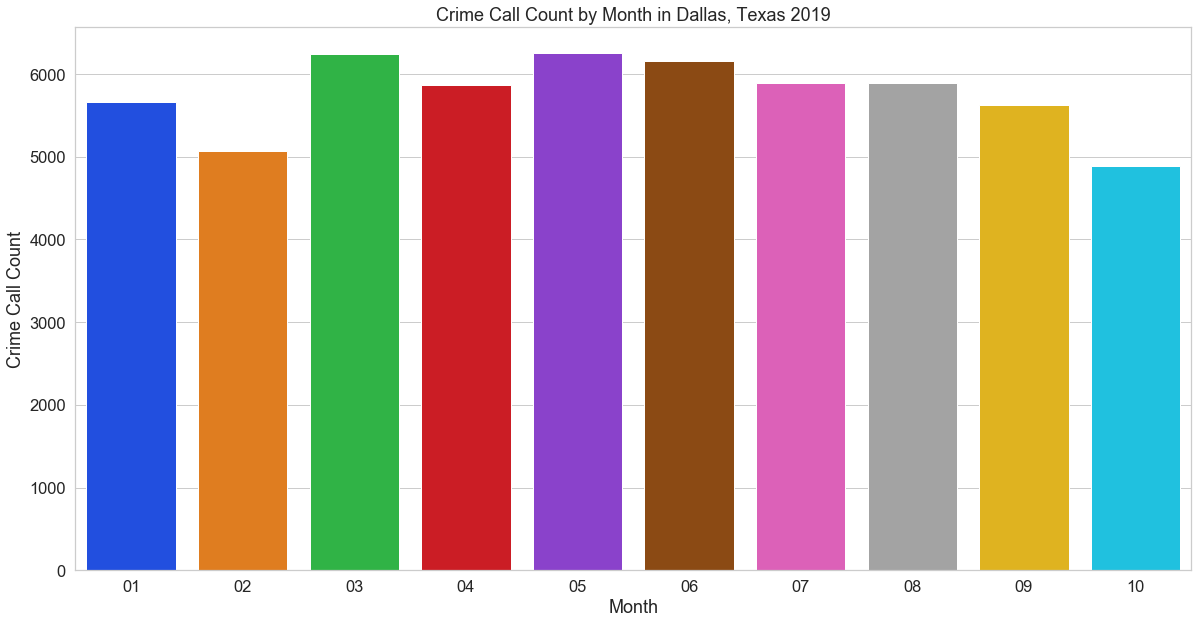

In [705]:
# Looking at this info visually
plt.figure(figsize = (20,10))
sns.barplot(x= month_count['month'], y= month_count['count'], data= month_count, palette= 'bright')
plt.title('Crime Call Count by Month in Dallas, Texas 2019')
plt.xlabel('Month')
plt.ylabel('Crime Call Count');

**Takeaways:**
- We see the same pattern as before that our summer months have some of the higher crime counts
- March and May are tied for months with the largest crime count! This is unlike any other year's data
- So far Feburary and October are the months with the lowest crime reports for 2019 (this could possibly change if we continued to collect data for 2019)

In [706]:
# What do crimes look like by day of the week? 
weekday = pd.DataFrame(crime['day1_of_the_week'].value_counts())

In [707]:
# Cleaning up our new data frame
weekday.reset_index(inplace = True)
weekday.rename(columns = {'index':'day_of_the_week', 'day1_of_the_week':'crime_count'}, inplace = True)
weekday

,day_of_the_week,crime_count
0,Fri,8919
1,Sat,8698
2,Sun,8428
3,Thu,7950
4,Mon,7935
5,Tue,7888
6,Wed,7727


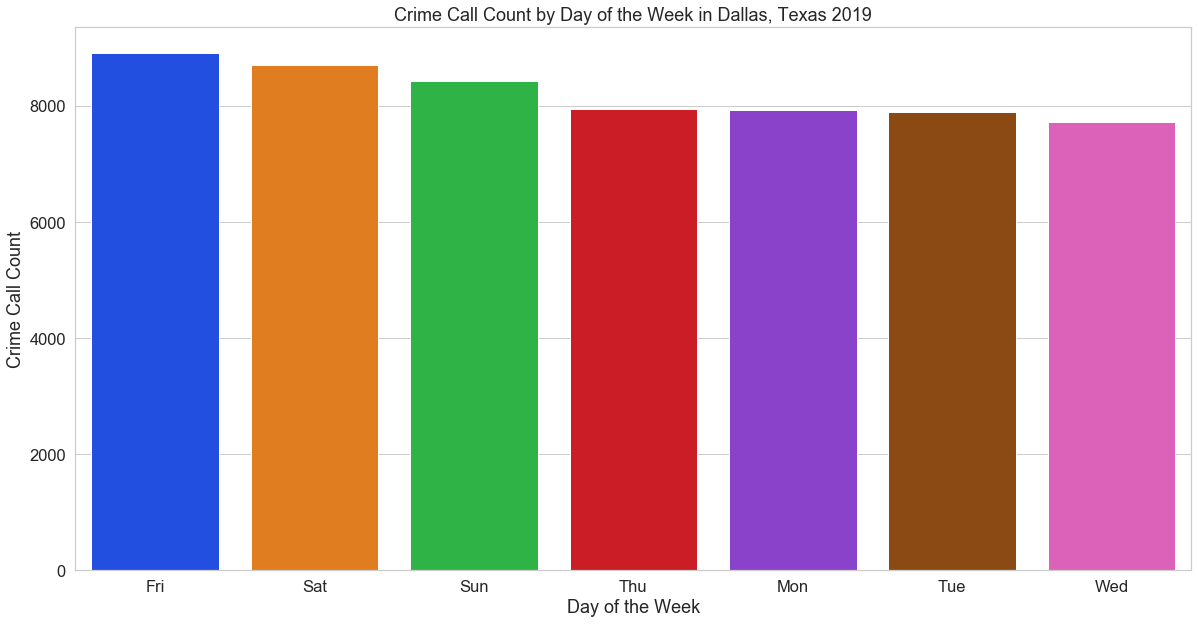

In [708]:
# Looking at this info visually
plt.figure(figsize = (20,10))
sns.barplot(x= weekday['day_of_the_week'], y= weekday['crime_count'], data= weekday, palette= 'bright')
plt.title('Crime Call Count by Day of the Week in Dallas, Texas 2019')
plt.xlabel('Day of the Week')
plt.ylabel('Crime Call Count');

**Takeaways:**
- Weekend days (Friday - Sunday) have the most crime occurrences
- Tuesday and Wednesday are the two lowest days of crime occurrences
- The day before (Thursday) and the day after (Monday) the weekend have show a ramp up and a slow down of crime reportd, respectively

In [709]:
# What do crimes look like based on numerical day of the year?
day_year = pd.DataFrame(crime['day_of_the_year'].value_counts())

In [710]:
# Typical clean up happening here
day_year.reset_index(inplace = True)
day_year.rename(columns = {'index':'numerical_day_of_year', 'day_of_the_year':'crime_count'}, inplace = True)
day_year.sort_values(by = 'numerical_day_of_year', inplace = True)
day_year.head()

,numerical_day_of_year,crime_count
1,1,268
219,2,174
257,3,165
83,4,206
64,5,209


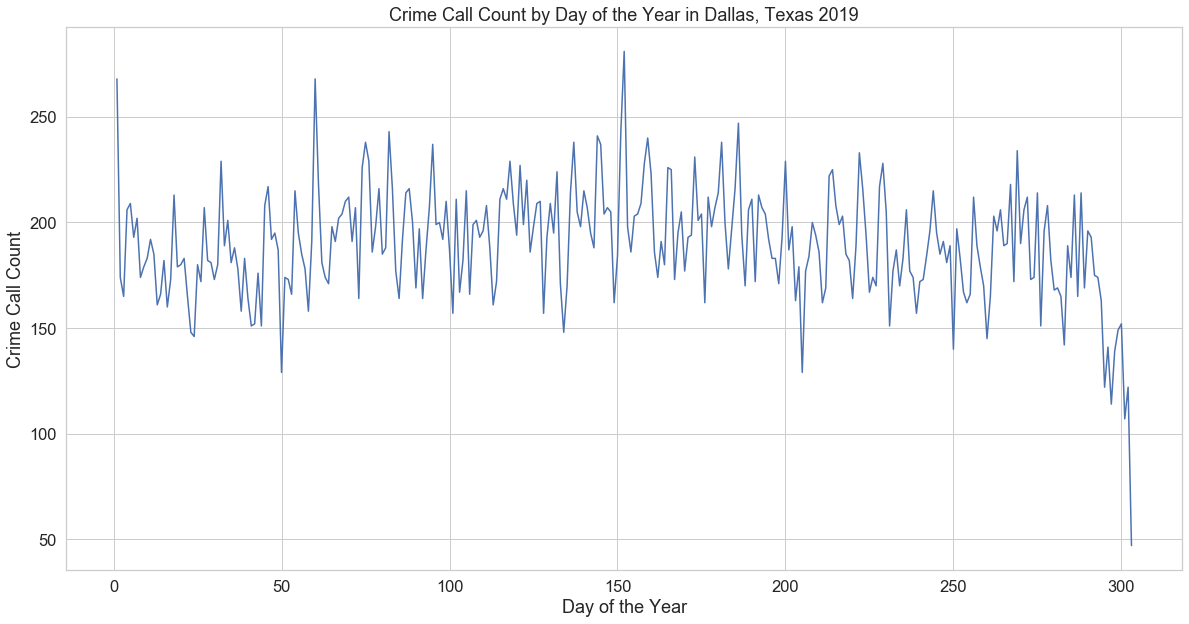

In [711]:
# Looking at this info visually
plt.figure(figsize = (20,10))
sns.lineplot(x= day_year['numerical_day_of_year'], y= day_year['crime_count'], data= day_year, palette= 'bright')
plt.title('Crime Call Count by Day of the Year in Dallas, Texas 2019')
plt.xlabel('Day of the Year')
plt.ylabel('Crime Call Count');

**Takeaways:**
- We see several spikes and valleys that have a fairly repeating pattern 
- We have some really high spikes in crime report counts around days 1, 50, and 150
- As we would expect crime counts lower drastically around day 300 due to our available amount of data for the current year.

In [712]:
# What do crimes look like by time of day (rounded to nearest hour)?
time_count = pd.DataFrame(crime['time_of_occurrence'].value_counts())

In [713]:
# Clean up new df
time_count.reset_index(inplace = True)
time_count.rename(columns= {'index':'time', 'time_of_occurrence':'crime_count'}, inplace = True)
time_count.sort_values(by= 'crime_count', inplace = True)

In [714]:
#Turning our time variable into a datetime and making an hour feature
time_count['time'] = pd.to_datetime(time_count['time'])
time_count['hour'] = time_count['time'].dt.hour

In [715]:
time_count.head()

,time,crime_count,hour
1415,2019-11-16 03:04:00,1,3
1388,2019-11-16 08:41:00,1,8
1387,2019-11-16 03:58:00,1,3
1386,2019-11-16 00:52:00,1,0
1385,2019-11-16 07:48:00,1,7


In [716]:
time_count.groupby('hour').sum()

,crime_count
hour,
0,4177
1,1960
2,1721
3,1382
4,1043
5,1053
6,1150
7,1432
8,2106


In [717]:
# Creating an hour count
hour_count = pd.DataFrame(time_count.groupby('hour').sum())


#Cleaning up our hour counts
hour_count.reset_index(inplace = True)
hour_count.rename(columns = {'crime_count':'count'}, inplace= True)
hour_count.sort_values(by = 'hour', inplace = True)
hour_count

,hour,count
0,0,4177
1,1,1960
2,2,1721
3,3,1382
4,4,1043
5,5,1053
6,6,1150
7,7,1432
8,8,2106
9,9,1880


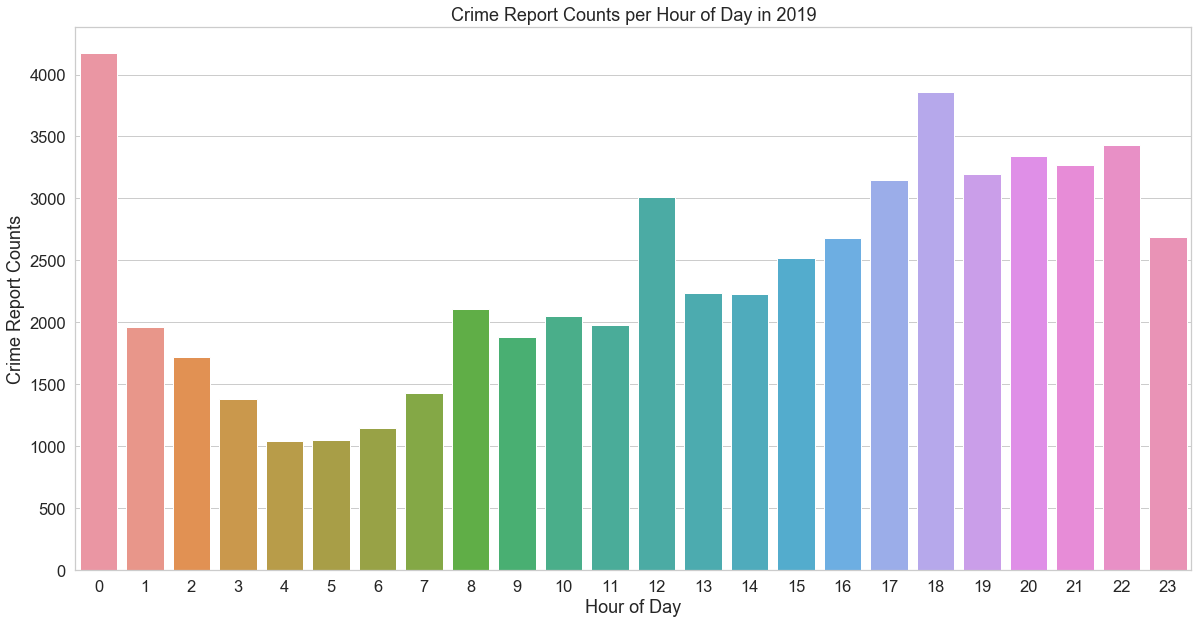

In [718]:
# What does this data look like, visually?
plt.figure(figsize = (20,10))
sns.barplot(x= hour_count['hour'], y= hour_count['count'], data = hour_count)
plt.title('Crime Report Counts per Hour of Day in 2019')
plt.xlabel('Hour of Day')
plt.ylabel('Crime Report Counts');

**Takeaways:**
- The highest amount of crime reports occur between 4pm and midnight
- Unlike other data we see a spike in call reports around noon!

Now that we've looked at our time based features let's move on to looking at our crime types and locations more closely!

### 2.4B: Crime Types and Locations

In [719]:
# What does crime look like by 911 call type?
call_type = pd.DataFrame(crime['911_call_type'].value_counts())

# Cleaning this up
call_type.reset_index(inplace = True)
call_type.rename(columns = {'index':'type', '911_call_type':'count'}, inplace = True)

In [720]:
call_type.head()

,type,count
0,11V - BURG MOTOR VEH,7352
1,58 - ROUTINE INVESTIGATION,6356
2,6X - MAJOR DIST (VIOLENCE),5342
3,09 - THEFT,4021
4,11R - BURG OF RES,3751


In [721]:
new = call_type["type"].str.split("-", n = 1, expand = True) 

In [722]:
call_type['type'] = new[1]

In [723]:
# Sanity check: do we have just the values we want?
call_type.head()

,type,count
0,BURG MOTOR VEH,7352
1,ROUTINE INVESTIGATION,6356
2,MAJOR DIST (VIOLENCE),5342
3,THEFT,4021
4,BURG OF RES,3751


In [724]:
call_type.sort_values(by = 'count', inplace = True)
call_type.head()

,type,count
107,BURG COIN OPER,1
100,BURG OF RES,1
101,MISSING PERSON,1
102,TOWREPO,1
106,PRISONER OTHER AGENCY,1


In [725]:
# How many different types of 911 calls were there?
len(call_type)

108

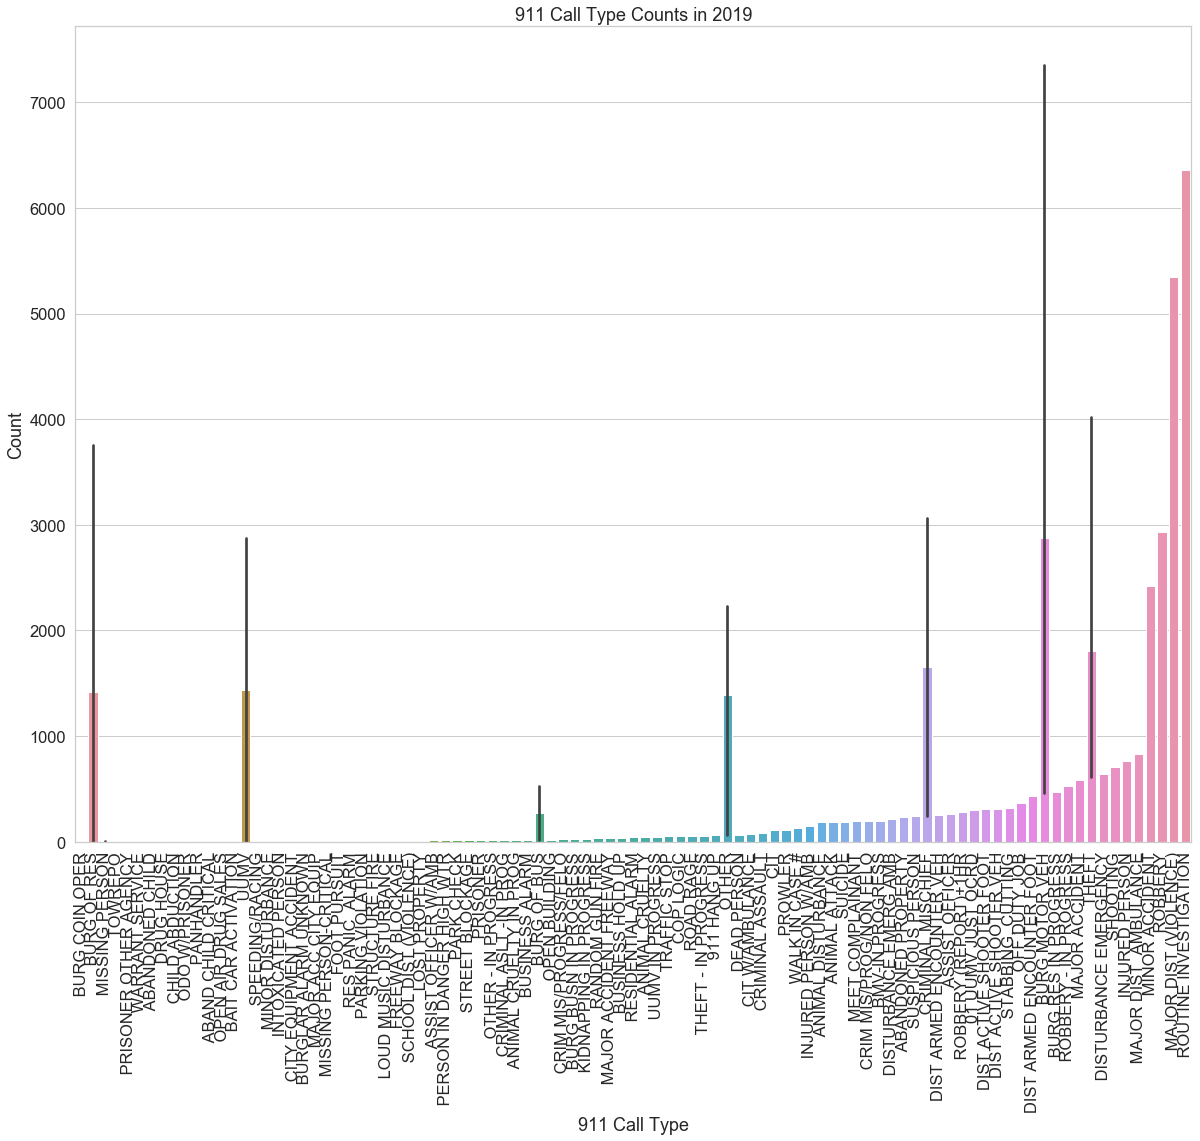

In [726]:
# What does this look like visually?
plt.figure(figsize = (20,15))
sns.barplot(x= call_type['type'], y = call_type['count'], data = call_type)
plt.title('911 Call Type Counts in 2019')
plt.xlabel('911 Call Type')
plt.ylabel('Count')
plt.xticks(rotation = 90);

In [727]:
#  Since that is a TOOOONNNN of information  let's spit it into top 20 crime types and bottom 20 crime types
top_20 = call_type.tail(20)
top_20.sort_values(by = 'count', ascending = False, inplace = True)
botttom_20 = call_type.head(20)

C:\Users\gothv\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


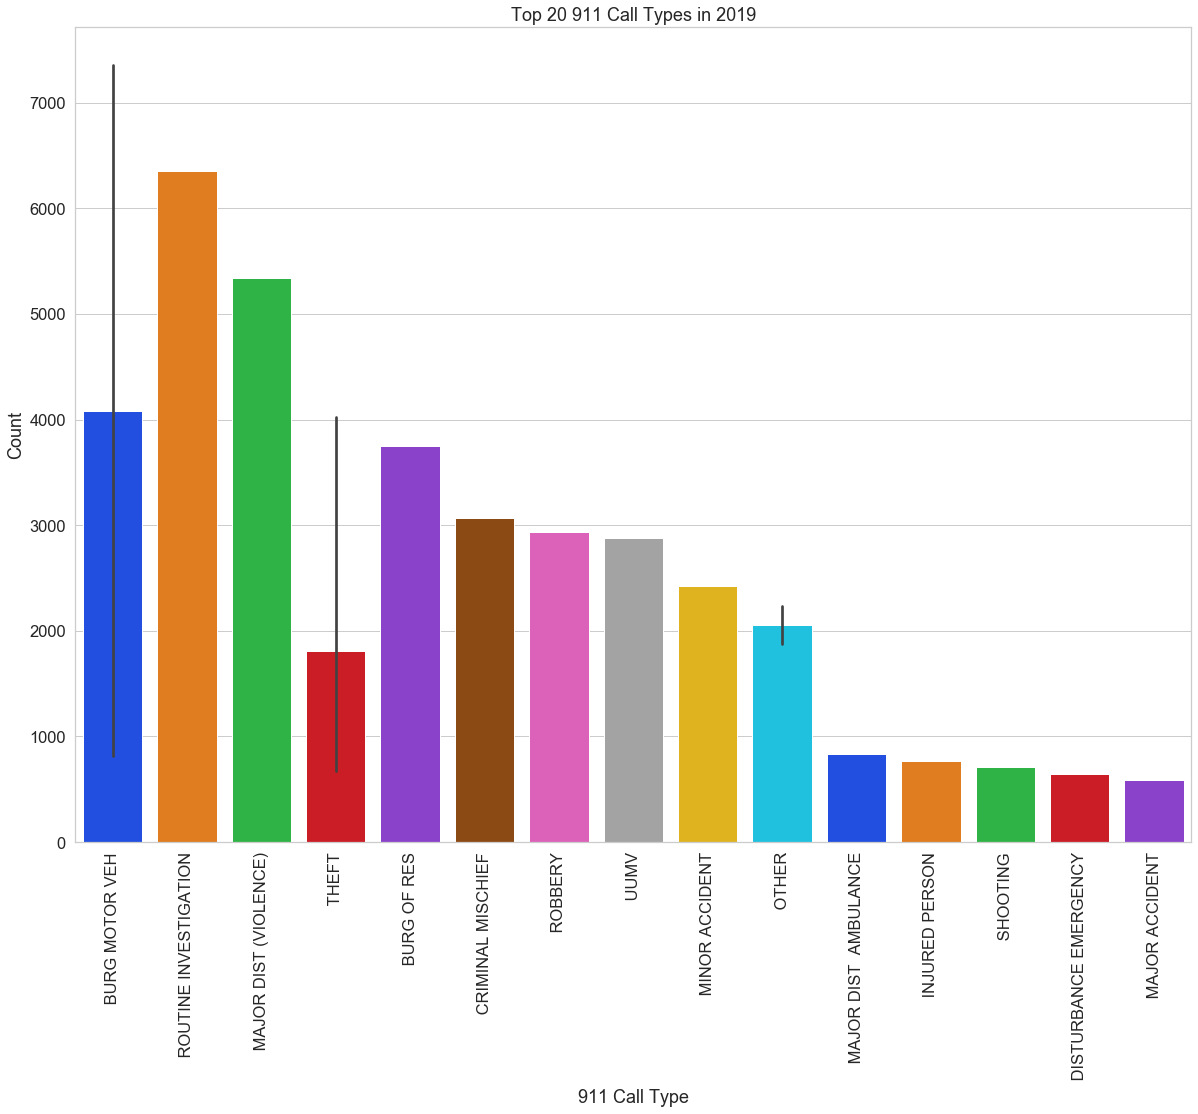

In [728]:
# Top 20 911 call types  viusally
plt.figure(figsize = (20,15))
sns.barplot(x= top_20['type'], y = top_20['count'], data = top_20, palette = 'bright')
plt.title('Top 20 911 Call Types in 2019')
plt.xlabel('911 Call Type')
plt.ylabel('Count')
plt.xticks(rotation = 90);

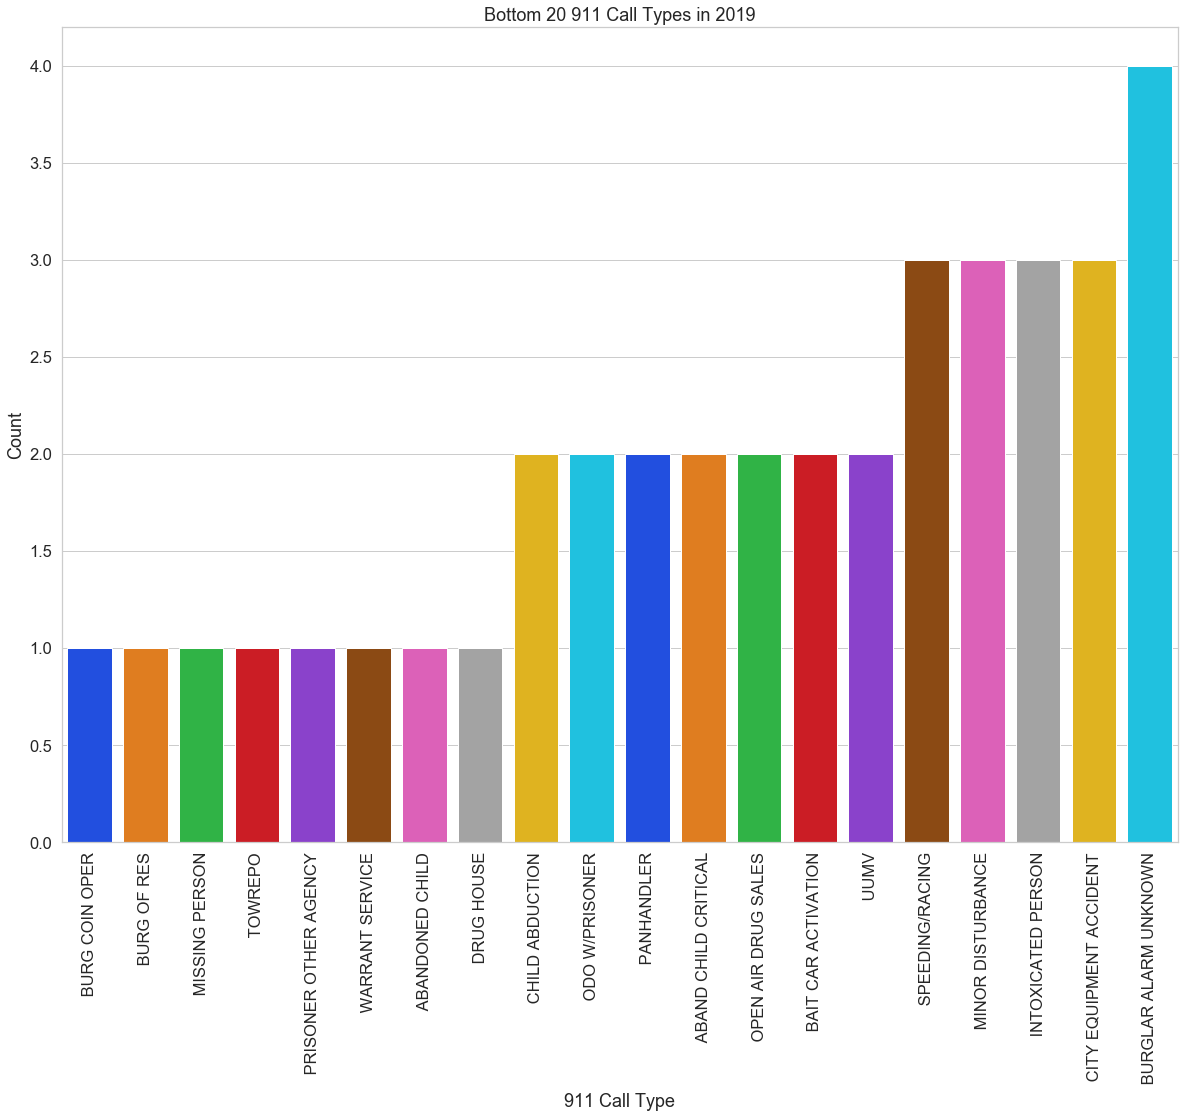

In [729]:
# Bottom 20 911 call types  viusally
plt.figure(figsize = (20,15))
sns.barplot(x= botttom_20['type'], y = botttom_20['count'], data = botttom_20, palette = 'bright')
plt.title('Bottom 20 911 Call Types in 2019')
plt.xlabel('911 Call Type')
plt.ylabel('Count')
plt.xticks(rotation = 90);

**Takeaways:**
- The most frequently occuring crime in 2019 is burglary of a motor vehicle (with some pretty funky outliers), routine investigation, and major disturbance
- Our bottom 20 crime types are very interesting and logically make sense that they are not frequently occurring. NOTE: since the Dallas Police Department removes any child-related violence calls from their public records there may actually be more incidents of child related crimes in actuality than present in this dataset.

In [730]:
# What does crime look like based on type of incident?
incident_type = pd.DataFrame(crime['type_of_incident'].value_counts())

In [731]:
# Typical clean up
incident_type.reset_index(inplace = True)
incident_type.rename(columns = {'index': 'incident_type', 'type_of_incident':'count'}, inplace = True)
incident_type.sort_values(by = 'count', inplace = True)

# Sanity check: does it look like we expected?
incident_type.head()

,incident_type,count
308,INTERFERE W/ PUBLIC DUTIES,1
270,THEFT OF PROP (AUTO ACC) > OR EQUAL $30K <$150...,1
269,GRAFFITI REAL/PERSONAL PROP > OR EQUAL $750 <$...,1
268,THEFT OF PROP > OR EQUAL $100 <$750 ENH (EMPLO...,1
267,THEFT OF PROP (ATT) <$100 W/PREV CONV (NOT EMP...,1


In [732]:
# Looking for top and bottom 20 crime types
top_20_crime = incident_type.tail(20)
top_20_crime.sort_values(by = 'count', ascending= False, inplace = True)

bottom_20_crimes= incident_type.head(20)

C:\Users\gothv\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


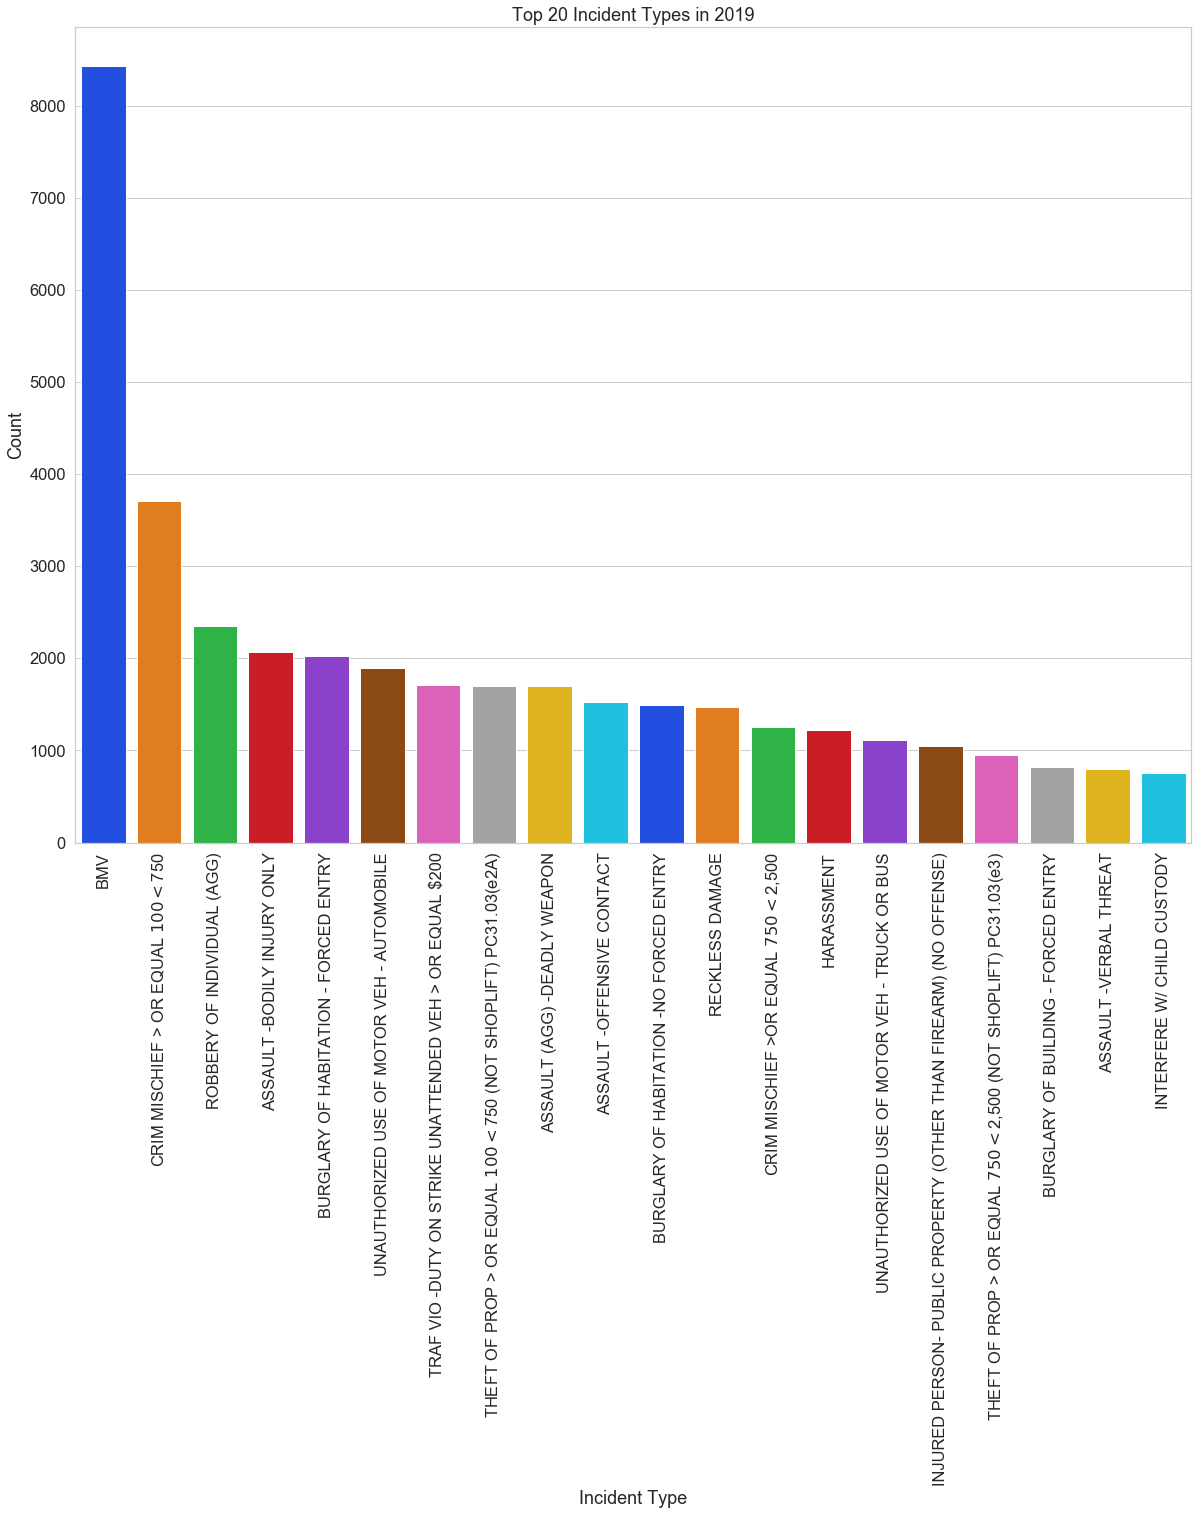

In [733]:
# Top 20 911 call types  viusally
plt.figure(figsize = (20,15))
sns.barplot(x= top_20_crime['incident_type'], y = top_20_crime['count'], data = top_20_crime, palette = 'bright')
plt.title('Top 20 Incident Types in 2019')
plt.xlabel('Incident Type')
plt.ylabel('Count')
plt.xticks(rotation = 90);

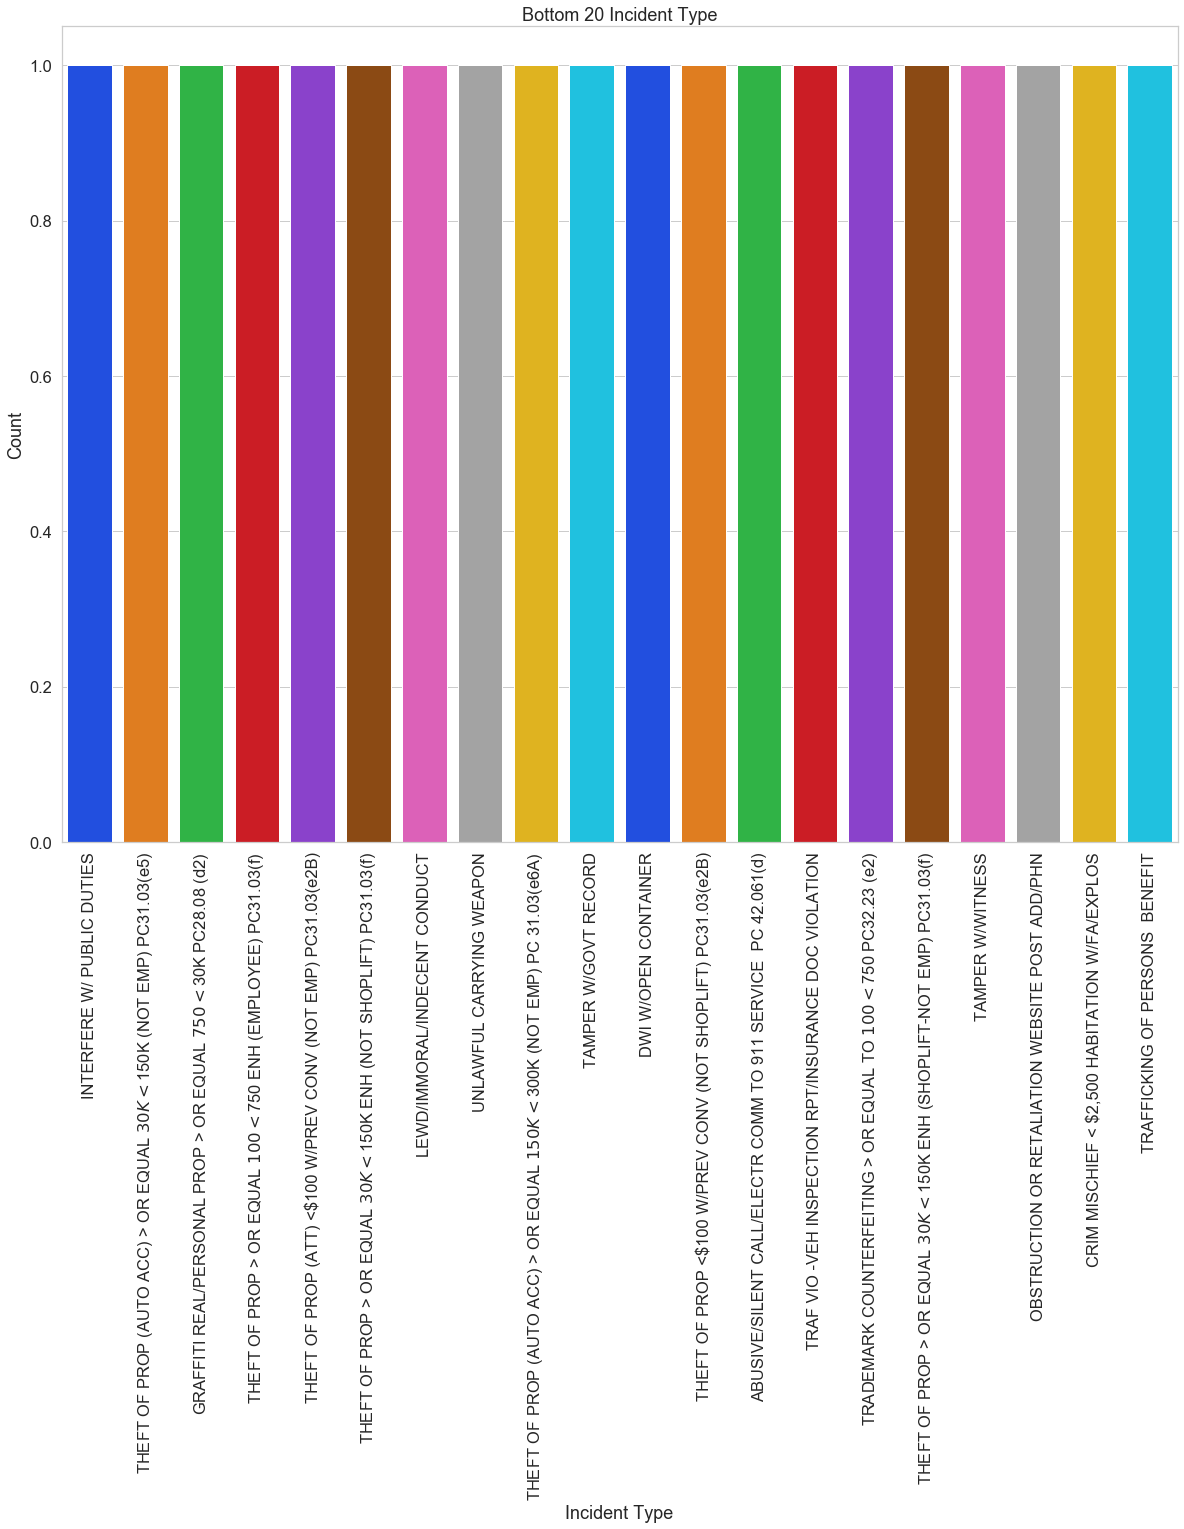

In [734]:
# Bottom 20 incident types  viusally
plt.figure(figsize = (20,15))
sns.barplot(x= bottom_20_crimes['incident_type'], y = bottom_20_crimes['count'], data = bottom_20_crimes, palette = 'bright')
plt.title('Bottom 20 Incident Type')
plt.xlabel('Incident Type')
plt.ylabel('Count')
plt.xticks(rotation = 90);

**Takeaways:**
- Burglary of a motor vehicle is the most common type of incident in 2019, followed by robbery of a person and criminal mischief with a value between $100 - $750
- There were a ton of crime types that had only one incident (these are some pretty weird and cool types: inpersonating people online, evading arrest, and illuminating an aircraft with a laser)

In [735]:
# What zip codes have the highest number of reported crimes?
zips = pd.DataFrame(crime['zip_code'].value_counts())

# Setting up sub-df correctly
zips.reset_index(inplace = True)
zips.rename(columns = {'index':'zip_code', 'zip_code':'count'}, inplace = True)
zips.sort_values(by = 'count', inplace = True)

In [736]:
# How many zip codes do we currently have?
len(zips)

74

In [737]:
# List of Dallas city limit zip codes- double checking that only inscope zips are included
in_scope= [75201, 75202,75203,75204,75205,75206,75207,75208,75209,75210,75211,75212,75214,75215,
            75216,75217,75218,75219,75220,75221,75222,75223,75224,75225,75226,75227,75228,75229, 
            75230, 75231, 75232, 75233, 75234, 75235, 75236, 75237, 75238, 75240, 75241, 75242, 75243,
            75244, 75245, 75246, 75247, 75248, 75249, 75250, 75251, 75252, 75253, 75254, 75258, 75260, 
            75261, 75262, 75263, 75264, 75265, 75266, 75267, 75270, 75275, 75277, 75283, 75284, 75285, 
            75286, 75287,75301, 75303, 75310, 75312, 75313,75315,75320,75323,75326,75334, 75366, 75339, 
            75340, 75342, 75343, 75344, 75354, 75355, 75356, 75357, 75358, 75359, 75360, 75367, 75368, 
            75370, 75371, 75372, 75373, 75374, 75376, 75378, 75379, 75380, 75381, 75382, 75387, 75389, 
            75390, 75391, 75392, 75393, 75394]

In [738]:
# Getting rid of any zip codes not in scope
zips = zips.loc[zips['zip_code'].isin(in_scope)]

In [739]:
top_zips

,zip_code,count
0,75217,3067
1,75216,3028
2,75228,2926
3,75243,2702
4,75220,2563
5,75211,2204
6,75204,2129
7,75215,2043
8,75227,1982
9,75241,1834


In [740]:
# Splitting our list into top 24 and botom 24 crime count zipcodes
bottom_zips = zips.head(24)
bottom_zips.sort_values(by = 'count', inplace = True)

top_zips = zips.tail(24)
top_zips.sort_values(by = 'count', ascending = False, inplace = True)

C:\Users\gothv\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\gothv\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [741]:
bottom_zips

,zip_code,count
63,75390,2
47,75246,181
46,75205,230
45,75244,232
44,75234,237
43,75249,298
42,75251,343
41,75225,429
40,75209,467
39,75252,511


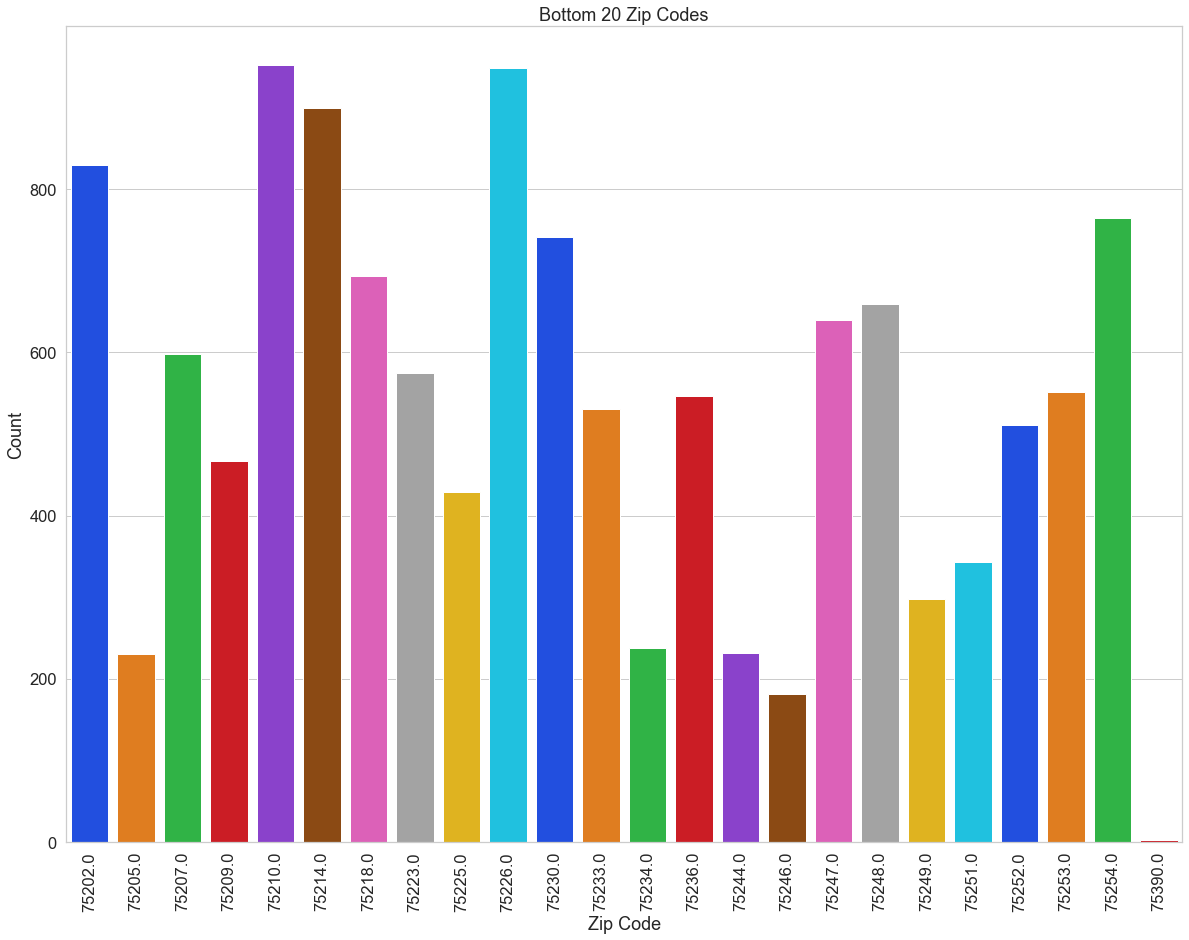

In [742]:
# What do our zip codes with top occurring number of crimes look like visually?
plt.figure(figsize = (20,15))
sns.barplot(x= bottom_zips['zip_code'], y = bottom_zips['count'], data = bottom_zips, palette = 'bright')
plt.title('Bottom 20 Zip Codes')
plt.xlabel('Zip Code')
plt.ylabel('Count')
plt.xticks(rotation = 90);

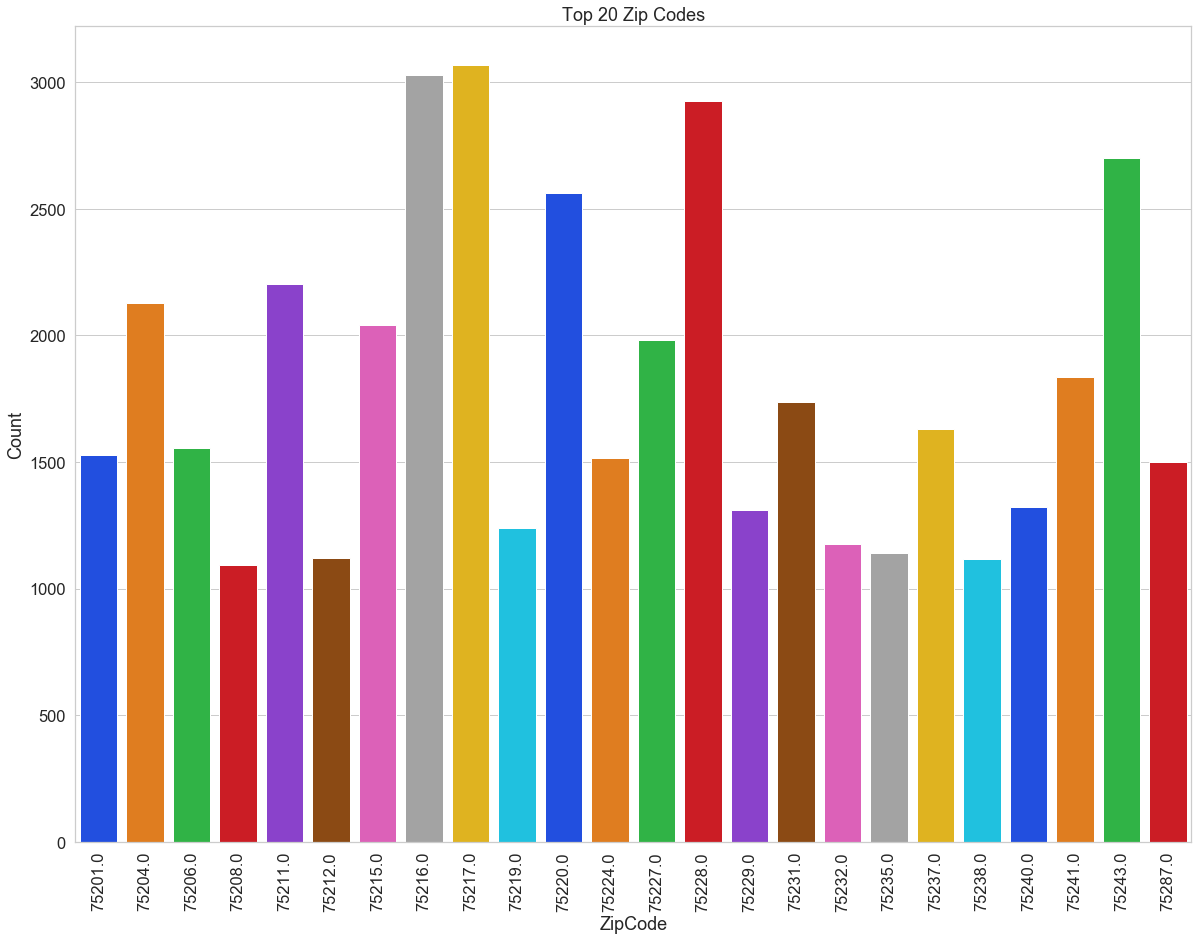

In [743]:
# What do our zip codes with top occurring number of crimes look like visually?
plt.figure(figsize = (20,15))
sns.barplot(x= top_zips['zip_code'], y = top_zips['count'], data = top_zips, palette = 'bright')
plt.title('Top 20 Zip Codes')
plt.xlabel('ZipCode')
plt.ylabel('Count')
plt.xticks(rotation = 90);

**Takeaways:**
- The top three zip codes with the most crimes counts are 75217, 75228, and 75216 (these three areas are all well known lower income areas of Dallas)
- The bottom three zip codes in numbers of crimes are 75390, 75246, and 75205 (these three areas are mainly middle to upper class neighborhoods and the first is for a medical district without residences)

Now that we have explored our type and geographic locations let's move on to victim information.

### 2.4C: All About Victims

In [744]:
# What do victims look like by age?
victim_ages = pd.DataFrame(crime['victim_age'].value_counts())

# Clean up
victim_ages.reset_index(inplace = True)
victim_ages.rename(columns = {'index':'victim_age', 'victim_age':'count'}, inplace = True)
victim_ages.sort_values(by = 'count',ascending = False,  inplace = True)

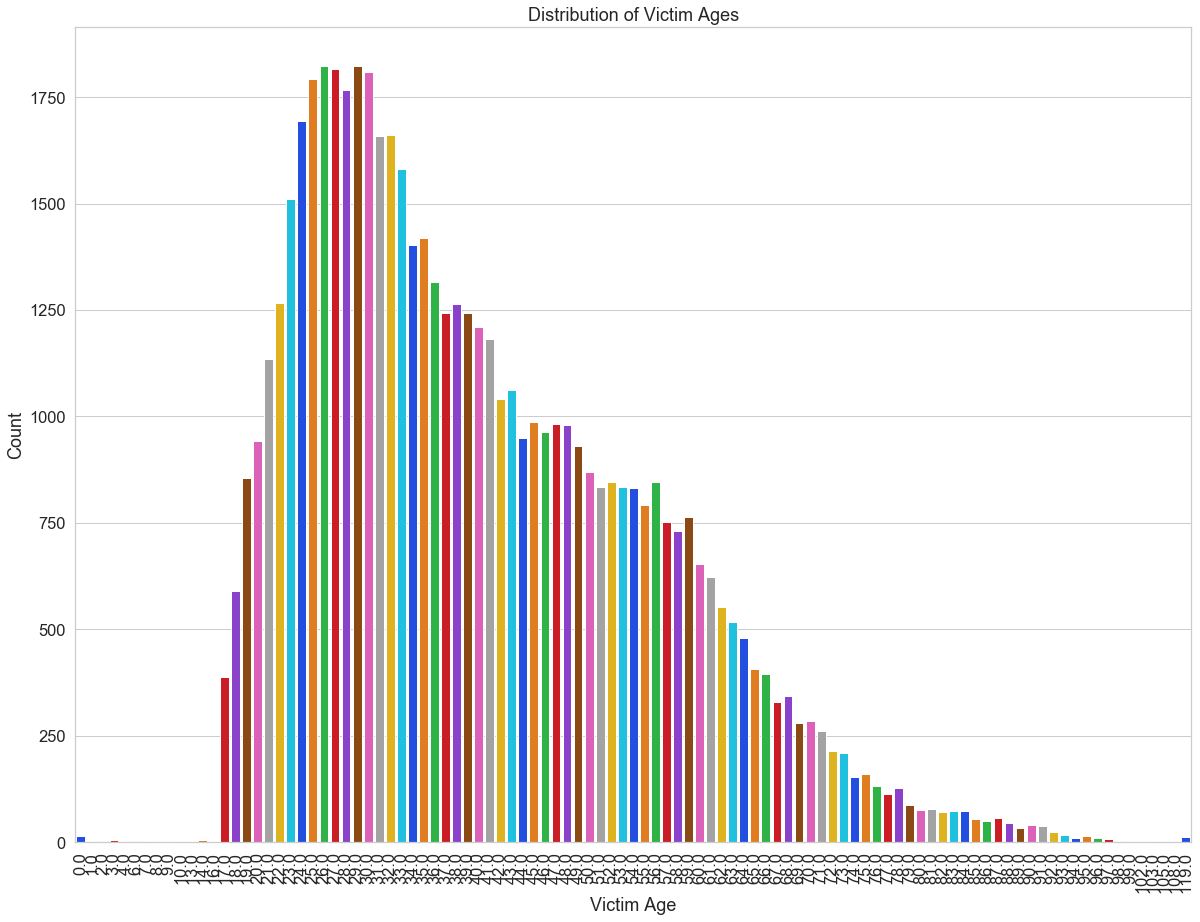

In [745]:
# What do our victim ages look like visually?
plt.figure(figsize = (20,15))
sns.barplot(x= victim_ages['victim_age'], y = victim_ages['count'], data = victim_ages, palette = 'bright')
plt.title('Distribution of Victim Ages')
plt.xlabel('Victim Age')
plt.ylabel('Count')
plt.xticks(rotation = 90);

In [746]:
# Breaking it down to top 20 victim ages and bottom 20 victim ages
top_ages = victim_ages.head(20)
top_ages.sort_values(by = 'count', ascending = False, inplace = True)
bottom_ages = victim_ages.tail(20)
bottom_ages.sort_values(by = 'count', inplace = True)

C:\Users\gothv\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\gothv\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [747]:
# Numerical top ages
top_ages

,victim_age,count
0,29,1824
1,26,1822
2,27,1815
3,30,1810
4,25,1792
5,28,1766
6,24,1694
7,32,1660
8,31,1658
9,33,1581


In [748]:
# NUmerical Bottom Ages
bottom_ages

,victim_age,count
100,13,1
98,103,1
97,108,1
96,105,1
95,8,1
99,10,1
94,16,2
93,1,2
85,9,3
86,4,3


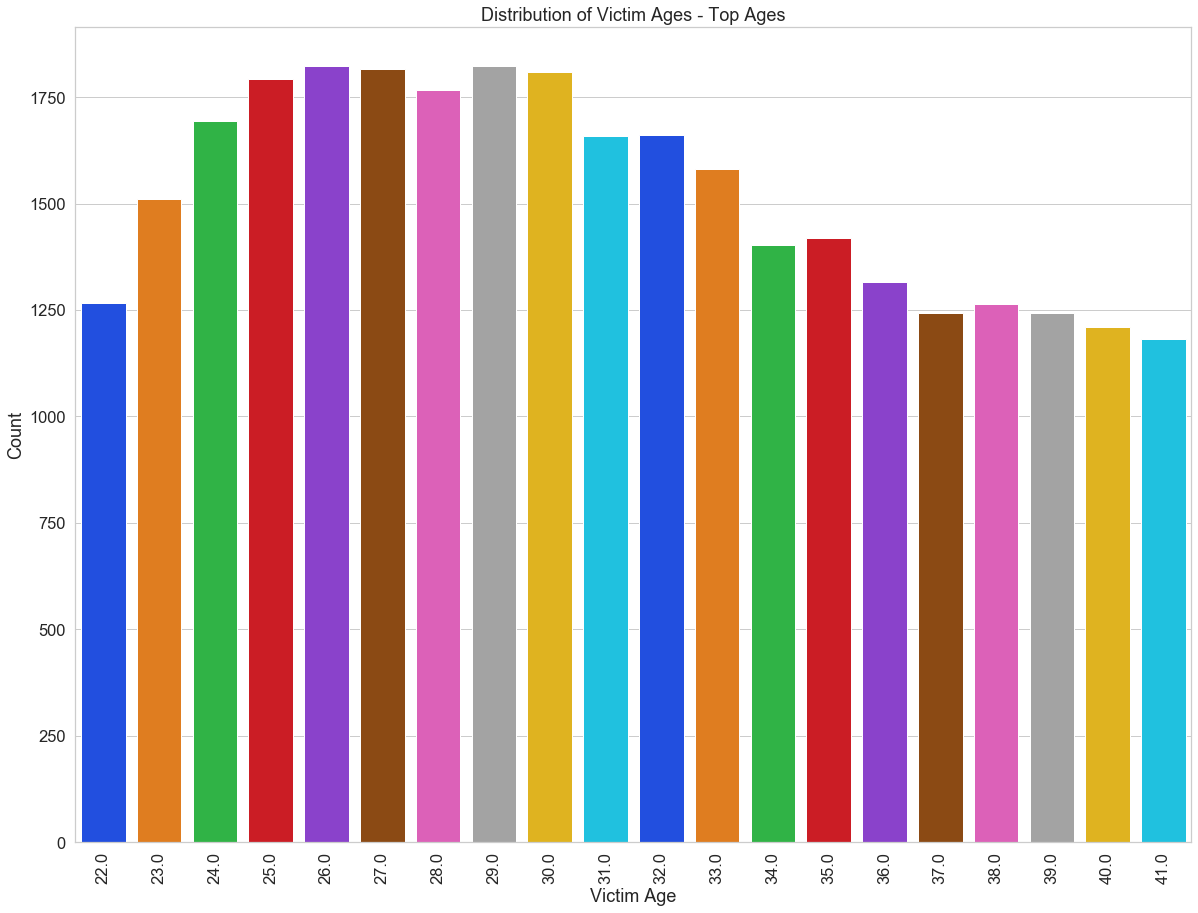

In [749]:
# What do top ages look like?
plt.figure(figsize = (20,15))
sns.barplot(x= top_ages['victim_age'], y = top_ages['count'], data = top_ages, palette = 'bright')
plt.title('Distribution of Victim Ages - Top Ages')
plt.xlabel('Victim Age')
plt.ylabel('Count')
plt.xticks(rotation = 90);

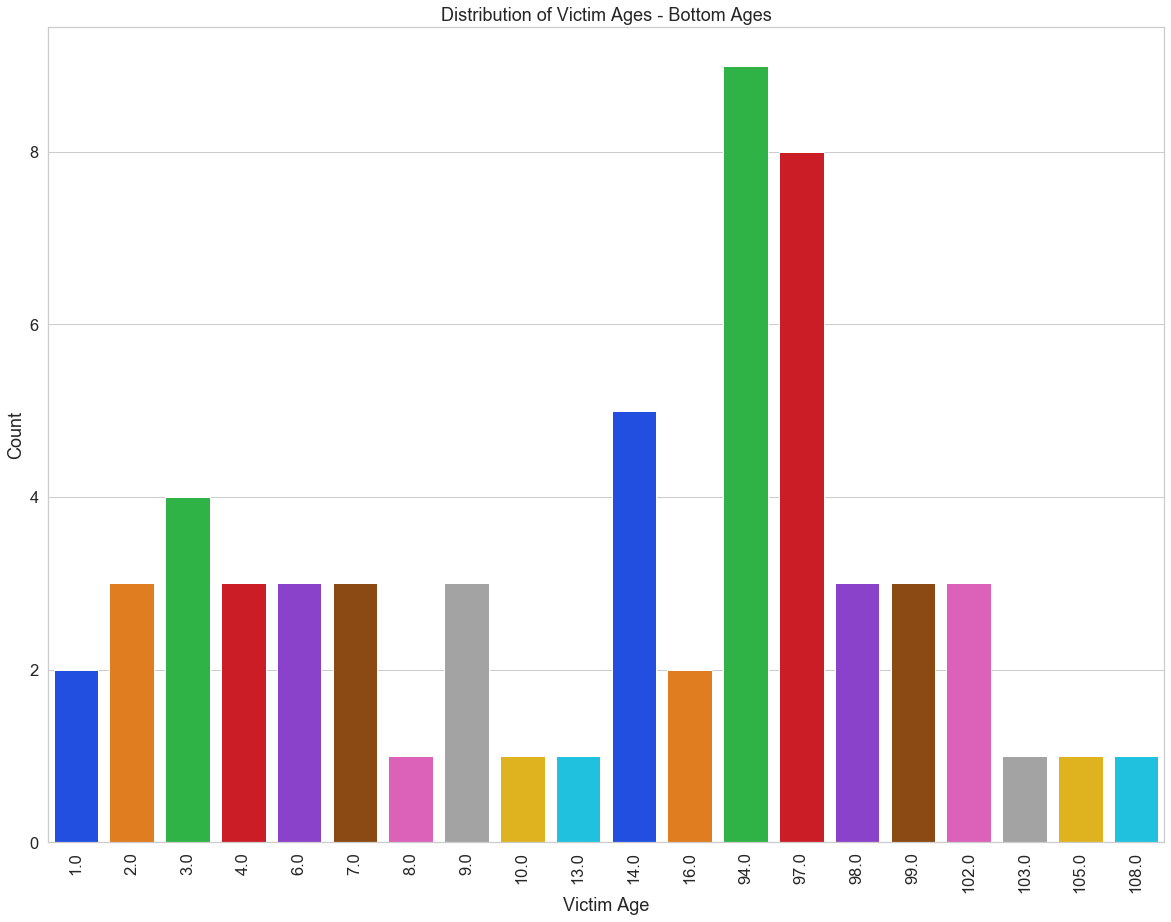

In [750]:
# What do bottom ages look like?
plt.figure(figsize = (20,15))
sns.barplot(x= bottom_ages['victim_age'], y = bottom_ages['count'], data = bottom_ages, palette = 'bright')
plt.title('Distribution of Victim Ages - Bottom Ages')
plt.xlabel('Victim Age')
plt.ylabel('Count')
plt.xticks(rotation = 90);

**Takeaways:**
- People in their upper 20's were the most frequent victims of crime in 2019
- Children under 10 and adults over 90 were the least frequent victims of crime (this could be due to the fact that certain crime types, such as sexual related crimes and crimes against children, are expunged from this database).

In [751]:
# What do victims look like by type? 
victim_types = pd.DataFrame(crime['victim_type'].value_counts())

# Clean up
victim_types.reset_index(inplace = True)
victim_types.rename(columns = {'index':'victim_type', 'victim_type':'count'}, inplace = True)
victim_types.sort_values(by = 'victim_type', inplace = True)

In [752]:
# Numerical victim types
victim_types

,victim_type,count
3,Business,2
2,Government,3
0,Individual,57535
1,Law Enforcement Offi,4
4,Society/Public,1


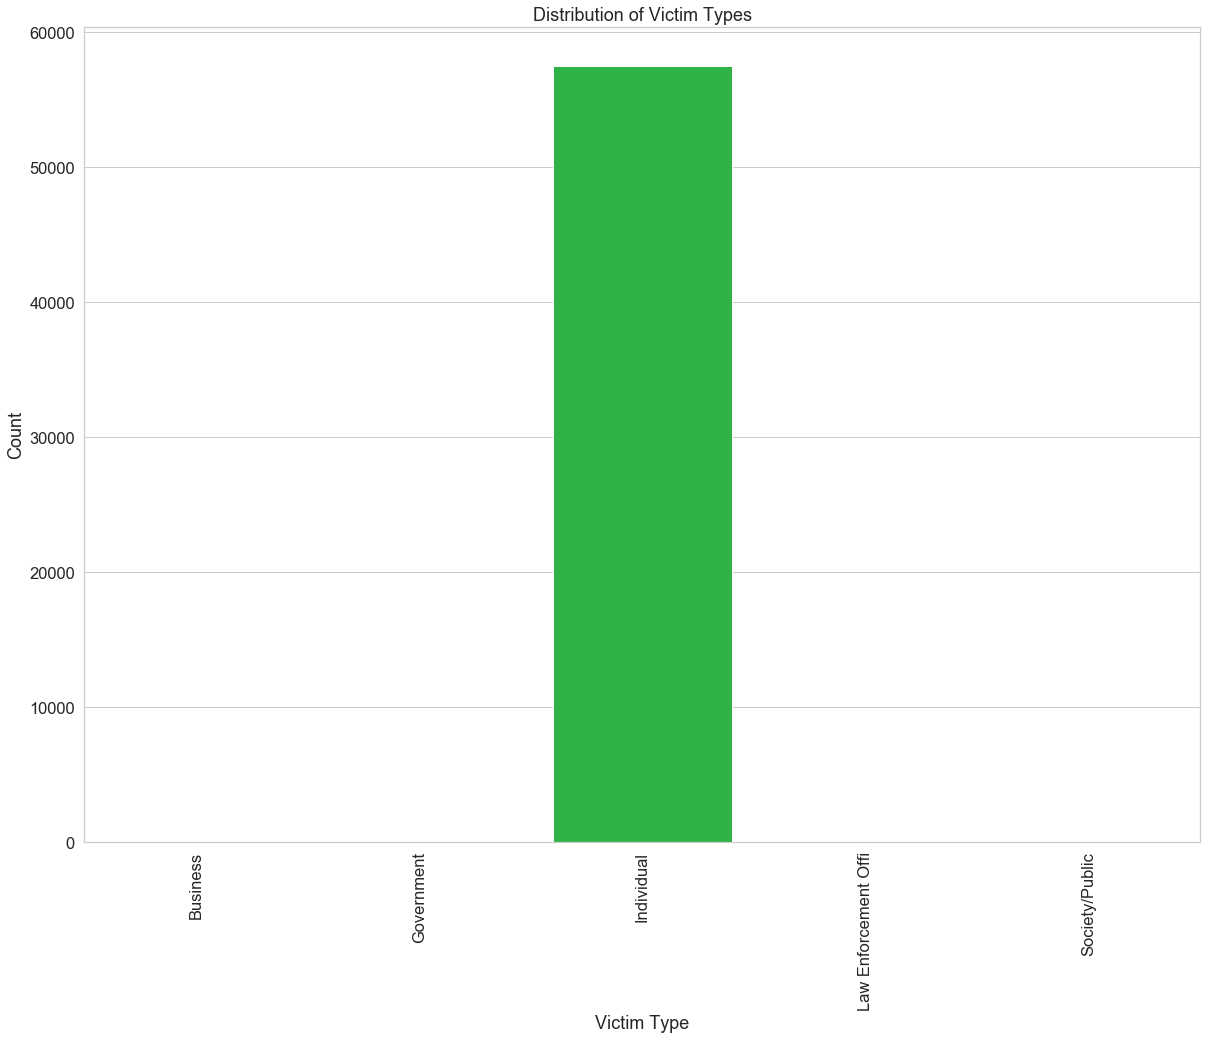

In [753]:
# There are only four victim types so let's look at them visually
plt.figure(figsize = (20,15))
sns.barplot(x= victim_types['victim_type'], y = victim_types['count'], data = victim_types, palette = 'bright')
plt.title('Distribution of Victim Types')
plt.xlabel('Victim Type')
plt.ylabel('Count')
plt.xticks(rotation = 90);

**Takeaways:**

Since there are only four available types of victims it maks total sense that the largest group of victims is individuals.

In [754]:
# What do victims look like by race?
victim_races = pd.DataFrame(crime['victim_race'].value_counts())

# Clean up
victim_races.reset_index(inplace = True)
victim_races.rename(columns = {'index':'victim_race', 'victim_race':'count'}, inplace = True)
victim_races.sort_values(by = 'count', ascending = False, inplace = True)

In [755]:
victim_races

,victim_race,count
0,Black,20252
1,White,17883
2,Hispanic or Latino,17448
3,Asian,882
4,Middle Eastern,776
5,Unknown,183
6,Native Hawaiian/Pacific Islander,69
7,American Indian or Alaska Native,52


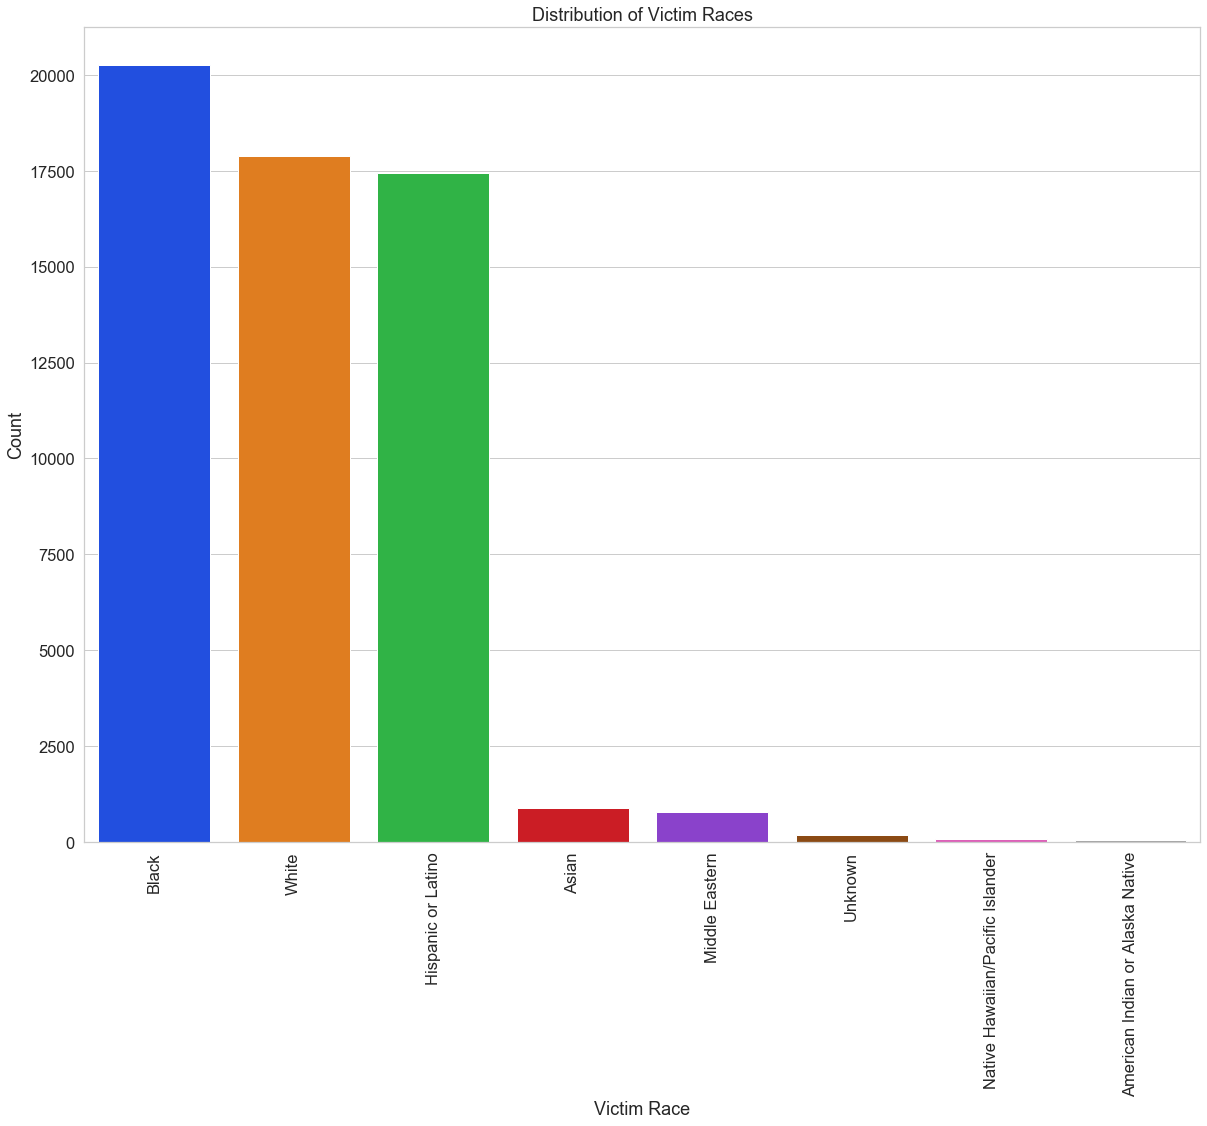

In [756]:
# What does this look look visually?
plt.figure(figsize = (20,15))
sns.barplot(x= victim_races['victim_race'], y = victim_races['count'], data = victim_races, palette = 'bright')
plt.title('Distribution of Victim Races')
plt.xlabel('Victim Race')
plt.ylabel('Count')
plt.xticks(rotation = 90);

**Takeaways:**

As with our prior year's data we still see that the top two ethnic groups for victims are Black and White. Our smallest race for victims is American Indian/Native, which makes sense as there is not a large Native population in Dallas according to census data.

In [757]:
# What do victims look like by ethnicity?
victim_ethnicities = pd.DataFrame(crime['victim_ethnicity'].value_counts())

# Clean up
victim_ethnicities.reset_index(inplace = True)
victim_ethnicities.rename(columns = {'index':'victim_ethnicity', 'victim_ethnicity':'count'}, inplace = True)
victim_ethnicities.sort_values(by = 'count',ascending = False,  inplace = True)

In [758]:
# What does this look like numerically?
victim_ethnicities

,victim_ethnicity,count
0,Non-Hispanic or Latino,40005
1,Hispanic or Latino,17448
2,Unknown,92


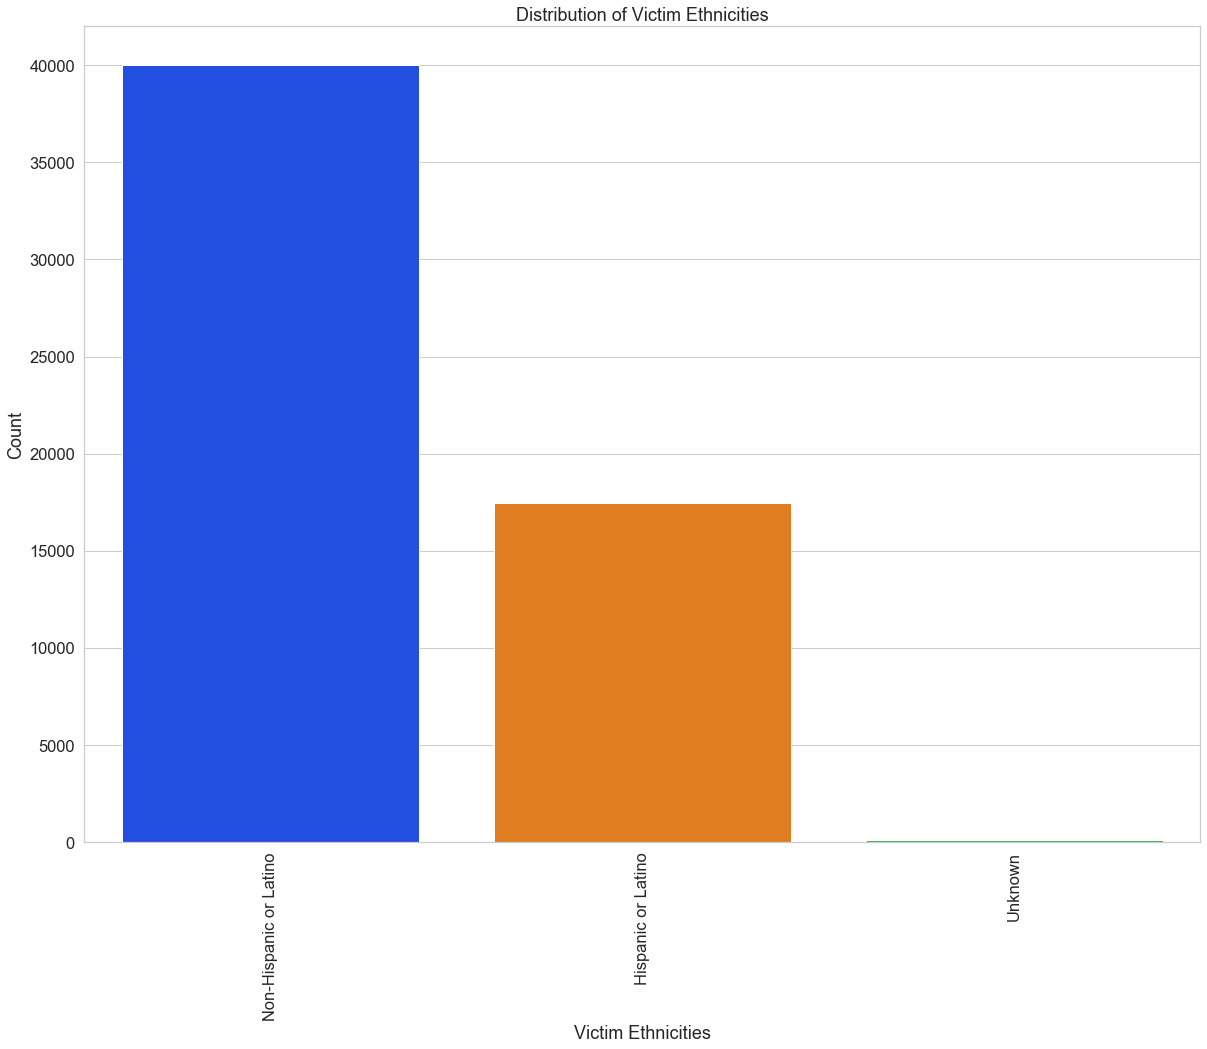

In [759]:
# Let's plot this!
plt.figure(figsize = (20,15))
sns.barplot(x= victim_ethnicities['victim_ethnicity'], y = victim_ethnicities['count'], data = victim_ethnicities, palette = 'bright')
plt.title('Distribution of Victim Ethnicities')
plt.xlabel('Victim Ethnicities')
plt.ylabel('Count')
plt.xticks(rotation = 90);

**Takeaways:**

Since victim ethnicities only consists of three categories(non-Hispanic, Hispanic, and unknown) so all we really gather for information is that there are more non-Hispanic victims that Hispanic victims.

In [760]:
# What do victims look like by gender?
victim_genders = pd.DataFrame(crime['victim_gender'].value_counts())

# Clean up
victim_genders.reset_index(inplace = True)
victim_genders.rename(columns = {'index':'victim_gender', 'victim_gender':'count'}, inplace = True)
victim_genders.sort_values(by = 'count', ascending = False, inplace = True)

In [761]:
# What do our victim's genders look like numerically?
victim_genders

,victim_gender,count
0,Male,32107
1,Female,25413
2,Unknown,25


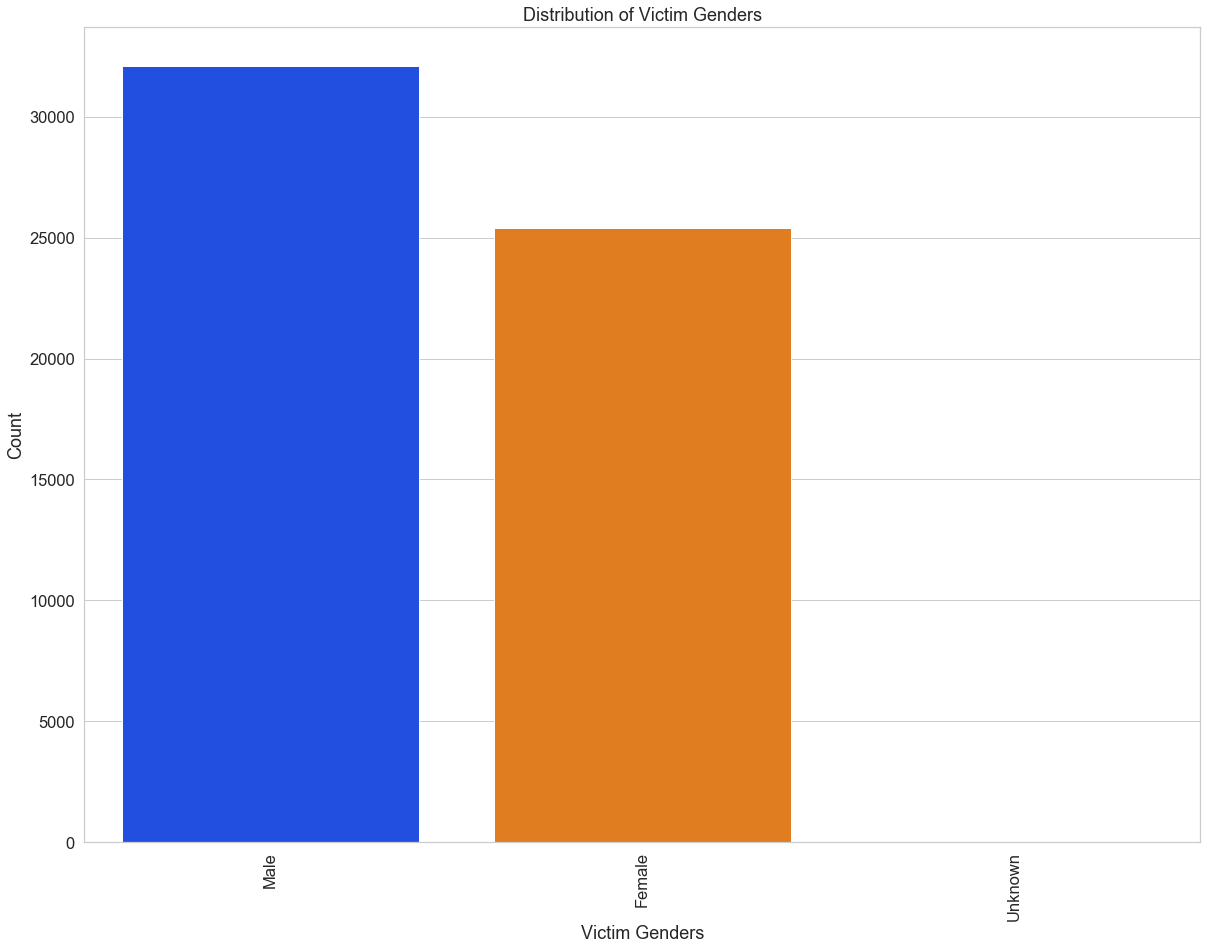

In [762]:
# Mooooooarrrr plotting
plt.figure(figsize = (20,15))
sns.barplot(x= victim_genders['victim_gender'], y = victim_genders['count'], data = victim_genders, palette = 'bright')
plt.title('Distribution of Victim Genders')
plt.xlabel('Victim Genders')
plt.ylabel('Count')
plt.xticks(rotation = 90);

**Takeaways:**

As with our other years' data we still see that male victims are the most reported. This could be due to the scrubbing of the original dataset for removing sexually related crimes.

Wow, that was a lot of information for a relatively short period of time. Let's move on to our weather data next.

## 3. Importing 2019 Weather Data and EDA

### 3.1: Importing Weather Data
[Back to Outline](#Project-Outline:-2019-Crime-and-Weather-Info)

In [763]:
# Importing our 2019 weather info here!
weather = pd.read_csv('2019_weather.csv')

In [764]:
weather.head()

,Unnamed: 0,Clouds,Conditions,DateUTC,DewpointF,HourlyPrecipIn,Humidity,PressureIn,SoftwareType,SolarRadiationWatts/m^2,TemperatureF,Time,WindDirection,WindDirectionDegrees,WindSpeedGustMPH,WindSpeedMPH,dailyrainin,station
0,0,NaN,NaN,2019-01-01 06:04:47,38,,75,3,AMBWeatherV3.0.3,,45,2019-01-01 00:04:47,NNE,31,3,2,,KTXIRVIN10
1,1,NaN,NaN,2019-01-01 06:09:51,37,,76,3,AMBWeatherV3.0.3,,45,2019-01-01 00:09:51,North,357,2,1,,KTXIRVIN10
2,2,NaN,NaN,2019-01-01 06:14:39,38,,77,3,AMBWeatherV3.0.3,,44,2019-01-01 00:14:39,WNW,302,6,4,,KTXIRVIN10
3,3,NaN,NaN,2019-01-01 06:19:43,38,,78,3,AMBWeatherV3.0.3,,44,2019-01-01 00:19:43,NNW,341,6,3,,KTXIRVIN10
4,4,NaN,NaN,2019-01-01 06:24:39,37,,78,3,AMBWeatherV3.0.3,,44,2019-01-01 00:24:39,North,3,2,2,,KTXIRVIN10


In [765]:
# Condensing down to the features we need
weather = weather[['DateUTC', 'TemperatureF', 'Humidity', 'HourlyPrecipIn']]

In [766]:
# Standardizing feature names
weather.columns = weather.columns.str.lower()
weather.rename(columns = {'dateutc':'date_only', 'temperaturef':'temp_in_F', 'hourlyprecipin':'percip_inches'}, inplace = True)

In [767]:
# Converting date_only to datetime
weather['date_only'] = pd.to_datetime(weather['date_only'])

In [768]:
# Checking for weird temps
weather.loc[weather['temp_in_F']<0].head()

,date_only,temp_in_F,humidity,percip_inches
11193,2019-02-09 04:59:35,-1,-32768,-1
11194,2019-02-09 05:04:39,-1,-32768,-1
11195,2019-02-09 05:09:31,-1,-32768,-1
11196,2019-02-09 05:13:40,-1,-32768,-1
11197,2019-02-09 05:16:39,-1,-32768,-1


In [769]:
# Keeping only temperatures above 0 F
weather = weather.loc[weather['temp_in_F'] >= 0]

In [770]:
weather.head()

,date_only,temp_in_F,humidity,percip_inches
0,2019-01-01 06:04:47,45,75,
1,2019-01-01 06:09:51,45,76,
2,2019-01-01 06:14:39,44,77,
3,2019-01-01 06:19:43,44,78,
4,2019-01-01 06:24:39,44,78,


In [771]:
# Creating a date column 
weather['date'] = weather['date_only'].dt.date

In [772]:
# Merging our data down by date and getting an average temperature per day
weather = weather.groupby('date').mean()

In [773]:
weather.head()

,temp_in_F,humidity,percip_inches
date,,,
2019-01-01,40,77,0e+00
2019-01-02,35,86,4e-02
2019-01-03,37,96,3e-02
2019-01-04,44,74,0e+00
2019-01-05,49,69,0e+00


In [774]:
# Resetting index and changing it's name
weather.reset_index(inplace = True)
weather.rename(columns = {'date':'date_only'}, inplace = True)

In [775]:
# Turning date only into a datetime 
weather['date_only'] = pd.to_datetime(weather['date_only'])

In [776]:
# Final check of what our weather data looks like
weather.head()

,date_only,temp_in_F,humidity,percip_inches
0,2019-01-01,40,77,0e+00
1,2019-01-02,35,86,4e-02
2,2019-01-03,37,96,3e-02
3,2019-01-04,44,74,0e+00
4,2019-01-05,49,69,0e+00


### 3.2: Exploratory Data Analysis of Weather
[Back to Outline](#Project-Outline:-2019-Crime-and-Weather-Info)

Explain that there is far less to go over since there is less data, but do it just the same.

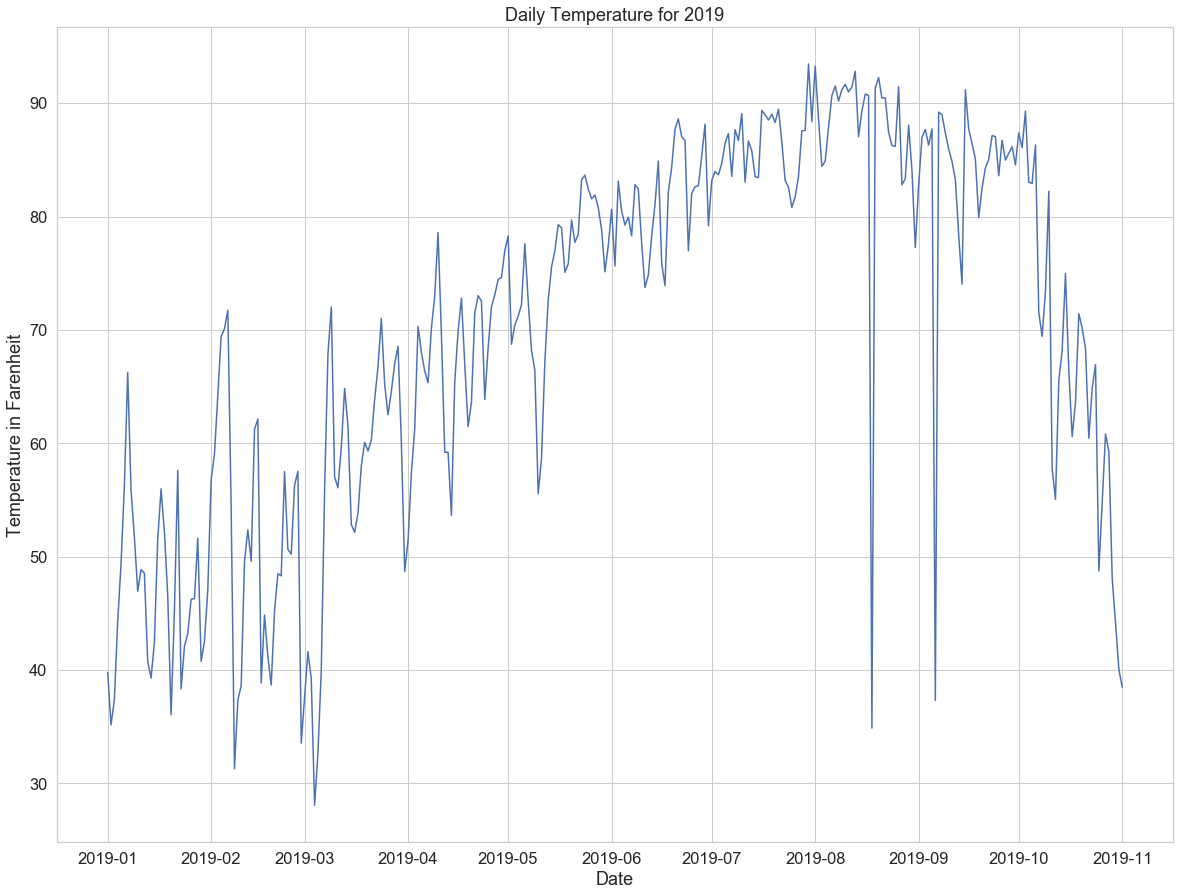

In [777]:
# What does our temperature look like over time?
plt.figure(figsize = (20,15))
sns.lineplot(x = weather['date_only'], y = weather['temp_in_F'], data = weather)
plt.title('Daily Temperature for 2019')
plt.xlabel('Date')
plt.ylabel('Temperature in Farenheit');

**Takeaways:**
 Even though this is only from January to October 2019 we see pretty similar patterns to our prior year's data for temperature. We will compare this data to prior year data in the last section of this notebook.


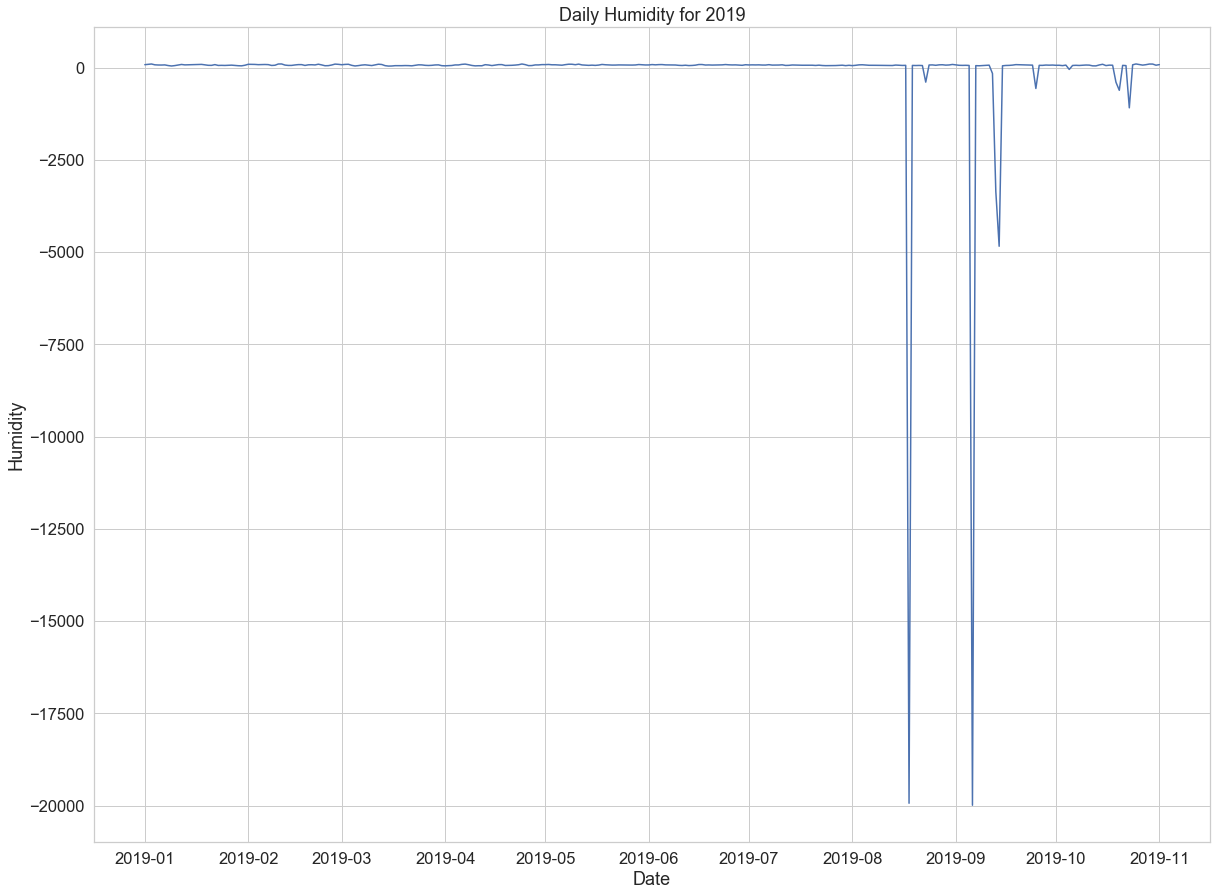

In [778]:
# What does humidity look like for this time period?
plt.figure(figsize = (20,15))
sns.lineplot(x = weather['date_only'], y = weather['humidity'], data = weather)
plt.title('Daily Humidity for 2019')
plt.xlabel('Date')
plt.ylabel('Humidity');

ICK! There are some super ugly outliers here. Let's look closer at them and then deal with them!

In [779]:
weather.loc[weather['humidity']<0]

,date_only,temp_in_F,humidity,percip_inches
229,2019-08-18,35,-19937,0e+00
234,2019-08-23,87,-395,0e+00
248,2019-09-06,37,-19991,0e+00
254,2019-09-12,83,-161,0e+00
255,2019-09-13,78,-3361,0e+00
256,2019-09-14,74,-4843,0e+00
267,2019-09-25,84,-567,0e+00
277,2019-10-05,83,-51,0e+00
291,2019-10-19,71,-398,3e-04
292,2019-10-20,70,-617,0e+00


In [780]:
# Getting rid of outlier humidity
weather = weather.loc[weather['humidity']>0]

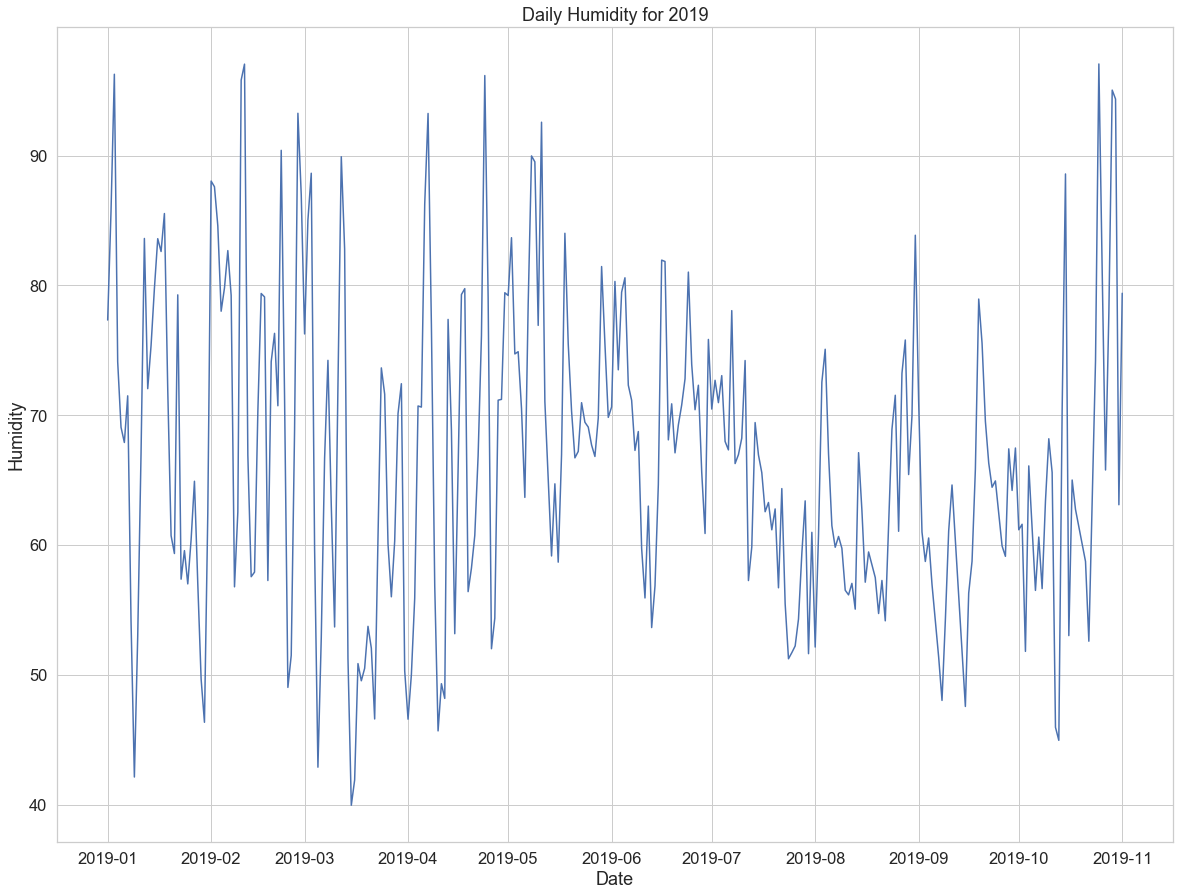

In [781]:
# Plotting it again
plt.figure(figsize = (20,15))
sns.lineplot(x = weather['date_only'], y = weather['humidity'], data = weather)
plt.title('Daily Humidity for 2019')
plt.xlabel('Date')
plt.ylabel('Humidity');

**Takeaways:**
- Humidity in Dallas is typically over 50% most days
- There were a few days in 2019 that had a humidity of less than 50% but not many. It will be interesting to compare this data to our prior years'.

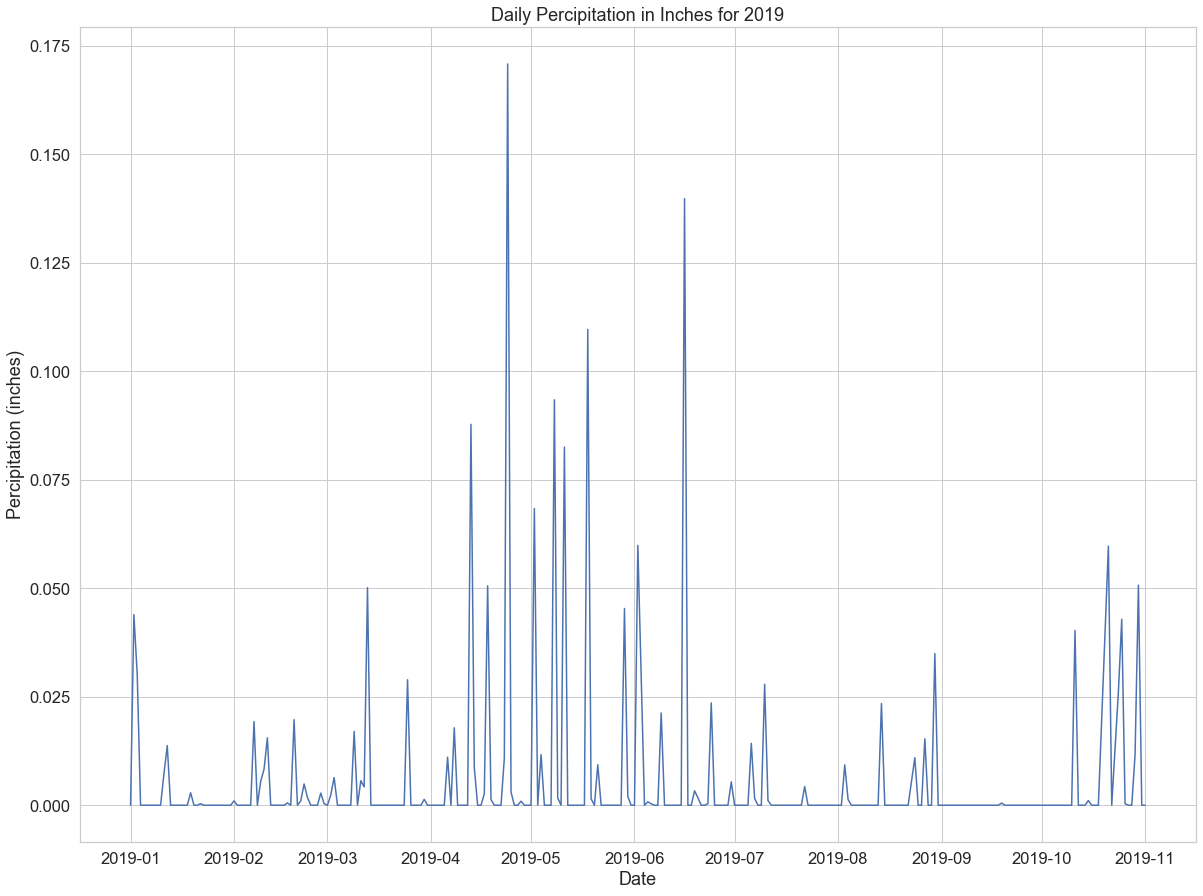

In [782]:
# What does percipitation look like for this time period?
plt.figure(figsize = (20,15))
sns.lineplot(x = weather['date_only'], y = weather['percip_inches'], data = weather)
plt.title('Daily Percipitation in Inches for 2019')
plt.xlabel('Date')
plt.ylabel('Percipitation (inches)');

**Takeaways:**
- There really isn't much rain in Dallas
- April, May, and June have the most rain in Dallas
- Most other months typically have less than 5% humidity

Since we now have a better understanding of what happened so far this year for both crime calls and weather data we can go ahead and combine our datasets for future use!

### 4. Combining Our Datasets
[Back to Outline](#Project-Outline:-2019-Crime-and-Weather-Info)

In [783]:
# Checking length of our crime data
len(crime)

57545

In [784]:
# Checking length of our weather data
len(weather)

294

In [785]:
# Merging our two dataframes together!
df2019 = pd.merge(crime, weather, how = 'left', on = 'date_only')

In [786]:
# Sanity check: did our merge go as we hoped?
df2019.head()

,911_call_type,type_of_incident,division,sector,council_district,date_of_occurrence,year_of_occurrence,month_of_occurrence,day1_of_the_week,time_of_occurrence,day_of_the_year,victim_type,victim_race,victim_ethnicity,victim_gender,victim_age,responding_officer_#1__badge_no,responding_officer_#1__name,responding_officer_#2_badge_no,responding_officer_#2__name,nibrs_crime_category,x_coordinate,y_cordinate,zip_code,date_only,year,month,day_of_year_number,month_year,daily_crime_count,temp_in_F,humidity,percip_inches
0,58 - ROUTINE INVESTIGATION,ASSAULT -BODILY INJURY ONLY,NORTHWEST,52,D2,01/01/2019,2019,January,Tue,03:00,1,Individual,Hispanic or Latino,Hispanic or Latino,Female,33,8890,"MCDANIEL,TONYA,MARIE",NaN,NaN,ASSAULT OFFENSES,2e+06,7e+06,75247,2019-01-01,2019,01,1,January-2019,268,4,77,
1,40/01 - OTHER,DOG BITE - INJURED PERSON,NORTHEAST,22,D9,01/01/2019,2019,January,Tue,12:00,1,Individual,Hispanic or Latino,Hispanic or Latino,Male,41,9844,"SMITH JR,GARY,DONALD",NaN,NaN,MISCELLANEOUS,3e+06,7e+06,75228,2019-01-01,2019,01,1,January-2019,268,4,77,
2,20 - ROBBERY,ASSAULT -BODILY INJURY ONLY,NORTHWEST,51,D2,01/01/2019,2019,January,Tue,04:55,1,Individual,Black,Non-Hispanic or Latino,Female,26,7180,"TAYLOR,DEBORA,ANN",NaN,NaN,ASSAULT OFFENSES,2e+06,7e+06,75247,2019-01-01,2019,01,1,January-2019,268,4,77,
3,40/01 - OTHER,UNEXPLAINED DEATH (NO OFFENSE),SOUTH CENTRAL,72,D4,01/01/2019,2019,January,Tue,17:00,1,Individual,Black,Non-Hispanic or Latino,Female,56,8708,"LIGHTLE,ERIC,C",6753,"MERENDA,MARK,J",MISCELLANEOUS,2e+06,7e+06,75224,2019-01-01,2019,01,1,January-2019,268,4,77,
4,31 - CRIMINAL MISCHIEF,CRIM MISCHIEF > OR EQUAL $100 < $750,SOUTHEAST,34,D7,01/01/2019,2019,January,Tue,19:00,1,Individual,Black,Non-Hispanic or Latino,Male,30,11086,"TAN,JADEN,HO",NaN,NaN,DESTRUCTION/ DAMAGE/ VANDALISM OF PROPERTY,2e+06,7e+06,75215,2019-01-01,2019,01,1,January-2019,268,4,77,


In [787]:
len(df2019)

57545

AWESOME! Now that we have all of our data together and beautiful let's export it to csv so we can use it in other parts of this project!

## 5. Comparing New to Old Data
[Back to Outline](#Project-Outline:-2019-Crime-and-Weather-Info)

Now that we have a deeper understanding of what happened in 2019 we can now go ahead and compare our past data to our current data. Due to the sheer amount of data in this project we will only be looking at a few features that would be the most interesting to see over time.
 
Note: we will use our 2019 data to double check our forecasting in a later part of this project!

### 5.1: Importing Our Prior Data for Comparisons

In [788]:
# Reading in old data
old_df = pd.read_csv('complete.csv')

In [789]:
# Looking at what this data looks like
old_df.head()

,Unnamed: 0,date_only,month,mnth_yr,day1_of_the_week,time_of_occurrence,day_of_the_year,temp_in_F,humidity,percip_inches,911_call_type,type_of_incident,division,sector,council_district,victim_type,victim_race,victim_ethnicity,victim_gender,victim_age,responding_officer_#1__badge_no,responding_officer_#1__name,responding_officer_#2_badge_no,responding_officer_#2__name,x_coordinate,y_cordinate,zip_code,total_pop,male,%_male,female,%_female,median_age,18_&_over,21_&_over,62_&_over,65_&_over,%_white,%_black,%_native,%_asian,%_hispanic,pop_over_16,%_pop_over_16,%_employed,%_unemployed,mean_household_income,%_families_poverty,%_all_people_poverty,year,zip_code.1
0,0,2015-01-01,1,January-2015,Thu,17:00,1,34,89,3e-02,11V - BURG MOTOR VEH,BMV,SOUTH CENTRAL,73,D8,Individual,White,Non-Hispanic or Latino,Male,50,8173,"JONES,REGINALD,LADUNNE",NaN,NaN,3e+06,7e+06,75241,50872,23984,46,26888,54,34,72,68,14,12,21,75,12,0e+00,20,3777,3777,49,6,42030,28,31,2015,75241
1,1,2015-01-01,1,January-2015,Thu,00:20,1,34,89,3e-02,31 - CRIMINAL MISCHIEF,CRIM MISCHIEF > OR EQUAL $50 BUT < $500,SOUTH CENTRAL,71,D4,Individual,Black,Non-Hispanic or Latino,Male,51,8133,"ADAMS,CORY,JAMES",NaN,NaN,2e+06,7e+06,75216,76015,35922,47,40093,53,35,72,68,16,13,30,65,3,1e-01,33,3142,3142,46,7,35651,34,39,2015,75216
2,2,2015-01-01,1,January-2015,Thu,08:00,1,34,89,3e-02,58 - ROUTINE INVESTIGATION,FRAUD USE/POSS IDENTIFYING INFO-PRELIMINARY IN...,CENTRAL,15,D2,Individual,Black,Non-Hispanic or Latino,Female,64,7341,"FREEMAN,DIANA,J",NaN,NaN,2e+06,7e+06,75215,22570,11298,49,11272,51,39,79,76,16,13,23,74,3,7e-01,17,2086,2086,45,6,36630,30,37,2015,75215
3,3,2015-01-01,1,January-2015,Thu,02:00,1,34,89,3e-02,40 - OTHER,ASSAULT -VERBAL THREAT,NORTHWEST,52,D6,Individual,Hispanic or Latino,Hispanic or Latino,Male,36,10767,"HOVIS,ALAN",5455,"AKON,FREDRICK,CHARLES",2e+06,7e+06,75220,69009,38379,53,30630,47,34,75,71,12,9,76,7,16,3e+00,48,4478,4478,63,5,104542,18,20,2015,75220
4,4,2015-01-01,1,January-2015,Thu,13:00,1,34,89,3e-02,31 - CRIMINAL MISCHIEF,CRIM MISCHIEF > OR EQUAL $50 BUT < $500,NORTHEAST,22,D9,Individual,Black,Non-Hispanic or Latino,Female,70,9654,"BANDAS,WAYI,ALIBEY",NaN,NaN,3e+06,7e+06,75228,106467,52189,49,54278,51,32,70,66,12,9,49,24,13,2e+00,49,3866,3866,61,7,51758,23,24,2015,75228


In [790]:
# Dropping the unnamed column
old_df.drop(columns = 'Unnamed: 0', inplace = True)

Since we now have our old data imported we can now go ahead and start making our comparisons by year. We will focus on the same three major types of features as before: time data, geographic  and crime type, and weather. We can also look at our overall census changes as well.

### 5.2: Changes Over Time in Time-Based Data

In [791]:
# Creating 2015 months
month15 = pd.DataFrame(old_df.loc[old_df['year']== 2015])
month15 = pd.DataFrame(month15['month'].value_counts())
month15.rename(columns = {'month':'count'}, inplace = True)
month15.sort_index(inplace = True)

In [792]:
# Making 2016 month info
month16 = pd.DataFrame(old_df.loc[old_df['year']== 2016])
month16 = pd.DataFrame(month16['month'].value_counts())
month16.rename(columns = {'month':'count'}, inplace = True)
month16.sort_index(inplace = True)

In [793]:
# Making 2017 month info
month17 = pd.DataFrame(old_df.loc[old_df['year']== 2017])
month17 = pd.DataFrame(month17['month'].value_counts())
month17.rename(columns = {'month':'count'}, inplace = True)
month17.sort_index(inplace = True)

In [794]:
# Making 2018 month info
month18 = pd.DataFrame(old_df.loc[old_df['year']== 2018])
month18 = pd.DataFrame(month18['month'].value_counts())
month18.rename(columns = {'month':'count'}, inplace = True)
month18.sort_index(inplace = True)

In [795]:
total_months= month15.copy()

In [796]:
total_months['2016']= month16['count']
total_months['2017'] = month17['count']
total_months['2018']= month18['count']
total_months['2019']= month_count['count']

total_months.reset_index(inplace = True)
total_months.rename(columns = {'index':'month', 'count':'2015'}, inplace = True)
total_months

,month,2015,2016,2017,2018,2019
0,1,4813,5533,5302,4801,6247
1,2,3912,4862,4636,3268,6158
2,3,5054,5288,4918,4880,5894
3,4,4981,5574,5132,4941,5888
4,5,5209,5677,5404,5484,5866
5,6,5497,5632,5230,5387,5662
6,7,5637,5663,5358,6255,5620
7,8,5469,5607,5522,6192,5064
8,9,5168,5452,5133,6033,4887
9,10,5724,5615,5198,5997,NaN


In [797]:
# Since we only have data until October for 2019 let's look at only the same range of months for our other years as well
total_months = total_months.loc[total_months['month']<= 9]
total_months.set_index('month', inplace = True)

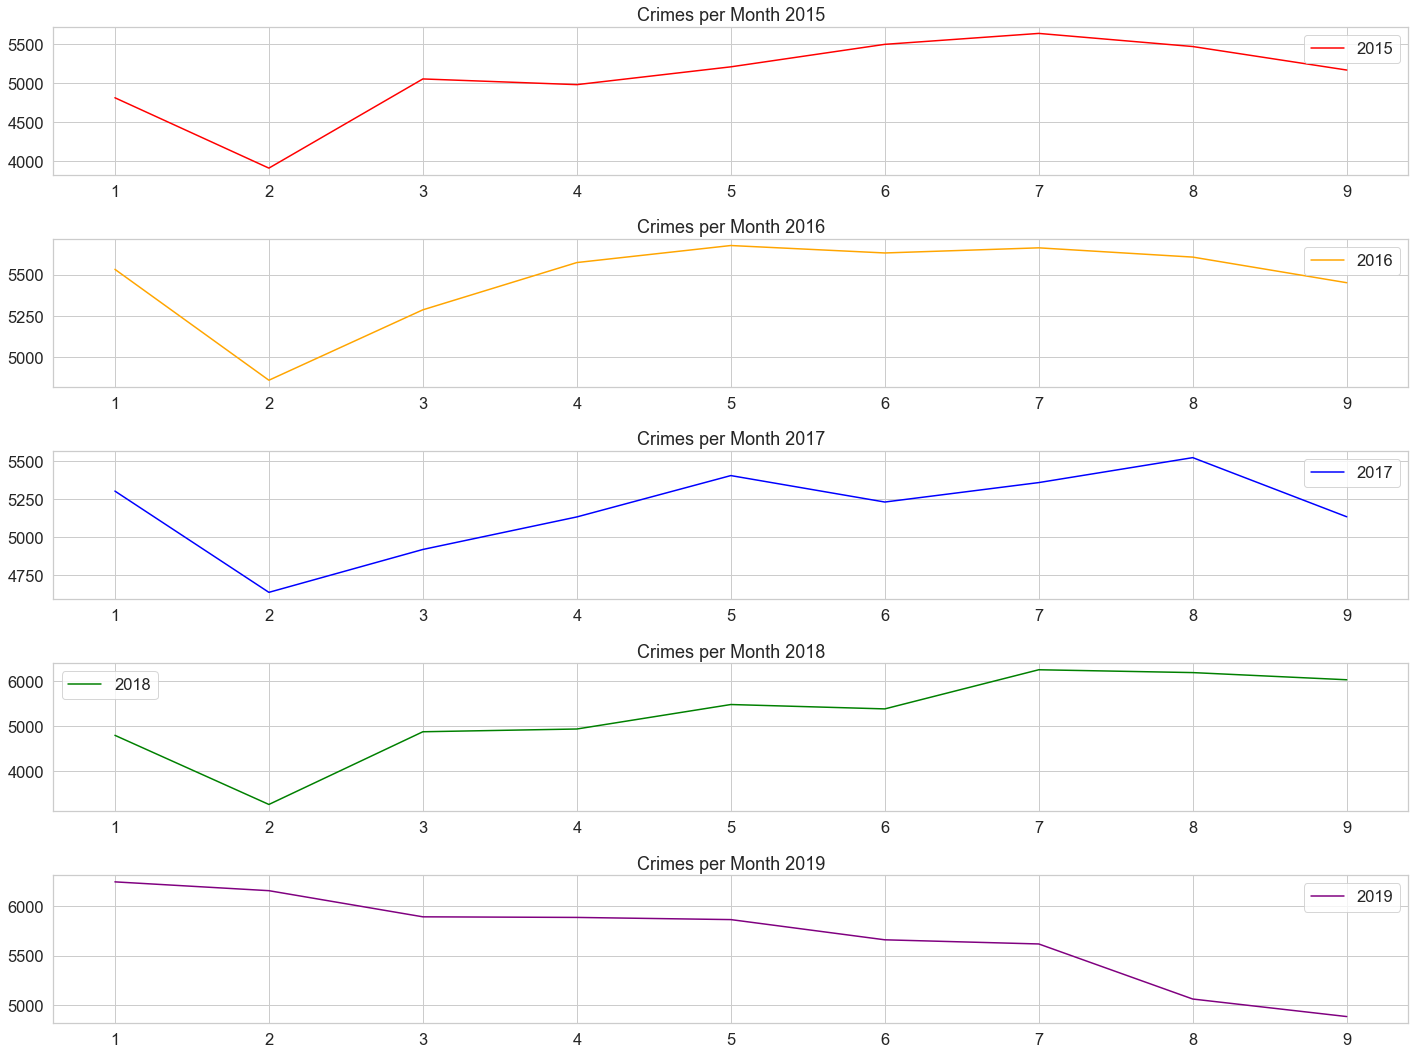

In [798]:
# Let's plot our yearly info about crimes by month
plt.figure(figsize= (20,15))

plt.subplot(511)
plt.plot(total_months['2015'], color = 'red',  label = '2015')
plt.legend(loc = 'best')
plt.title('Crimes per Month 2015')

plt.subplot(512)
plt.plot(total_months['2016'], color = 'orange',  label = '2016')
plt.legend(loc = 'best')
plt.title('Crimes per Month 2016')

plt.subplot(513)
plt.plot(total_months['2017'], color = 'blue',  label = '2017')
plt.legend(loc = 'best')
plt.title('Crimes per Month 2017')

plt.subplot(514)
plt.plot(total_months['2018'], color = 'green',  label = '2018')
plt.legend(loc = 'best')
plt.title('Crimes per Month 2018')

plt.subplot(515)
plt.plot(total_months['2019'], color = 'purple',  label = '2019')
plt.legend(loc = 'best')
plt.title('Crimes per Month 2019')

plt.tight_layout()

**Takeaways:**
- Crime in 2019 actually decreased after May
- Our 2015- 2018 has very similar lines while out 2019 data actually sharply decreases.

In [799]:
# What do crime counts look like per weekday over time?
weekday15 = pd.DataFrame(old_df.loc[old_df['year']== 2015])
weekday15= weekday15.loc[weekday15['month']<= 9]
weekday15 = pd.DataFrame(weekday15['day1_of_the_week'].value_counts())
weekday15.rename(columns = {'day1_of_the_week':'count'}, inplace = True)
weekday15.sort_index(inplace = True)

weekday16 = pd.DataFrame(old_df.loc[old_df['year']== 2016])
weekday16= weekday16.loc[weekday16['month']<= 9]
weekday16 = pd.DataFrame(weekday16['day1_of_the_week'].value_counts())
weekday16.rename(columns = {'day1_of_the_week':'count'}, inplace = True)
weekday16.sort_index(inplace = True)

weekday17 = pd.DataFrame(old_df.loc[old_df['year']== 2017])
weekday17= weekday17.loc[weekday17['month']<= 9]
weekday17 = pd.DataFrame(weekday17['day1_of_the_week'].value_counts())
weekday17.rename(columns = {'day1_of_the_week':'count'}, inplace = True)
weekday17.sort_index(inplace = True)

weekday18 = pd.DataFrame(old_df.loc[old_df['year']== 2018])
weekday18= weekday18.loc[weekday18['month']<= 9]
weekday18 = pd.DataFrame(weekday18['day1_of_the_week'].value_counts())
weekday18.rename(columns = {'day1_of_the_week':'count'}, inplace = True)
weekday18.sort_index(inplace = True)

In [800]:
# Dealing with our 2019 Counts
weekday.sort_values(by= 'day_of_the_week',inplace = True)
weekday.head()
weekday19= weekday.crime_count.to_list()

In [801]:
total_weekday= weekday15.copy()
total_weekday['2016'] = weekday16['count']
total_weekday['2017'] = weekday17['count']
total_weekday['2018'] = weekday18['count']
total_weekday['2019']= weekday19
total_weekday.rename(columns = {'count':'2015'}, inplace = True)
total_weekday

,2015,2016,2017,2018,2019
Fri,6717,7682,6970,7322,8919
Mon,6294,6865,6664,6468,7935
Sat,6938,7339,6886,7060,8698
Sun,6859,7297,6976,6871,8428
Thu,6435,6730,6477,6778,7950
Tue,6104,6756,6336,6294,7888
Wed,6393,6619,6326,6448,7727


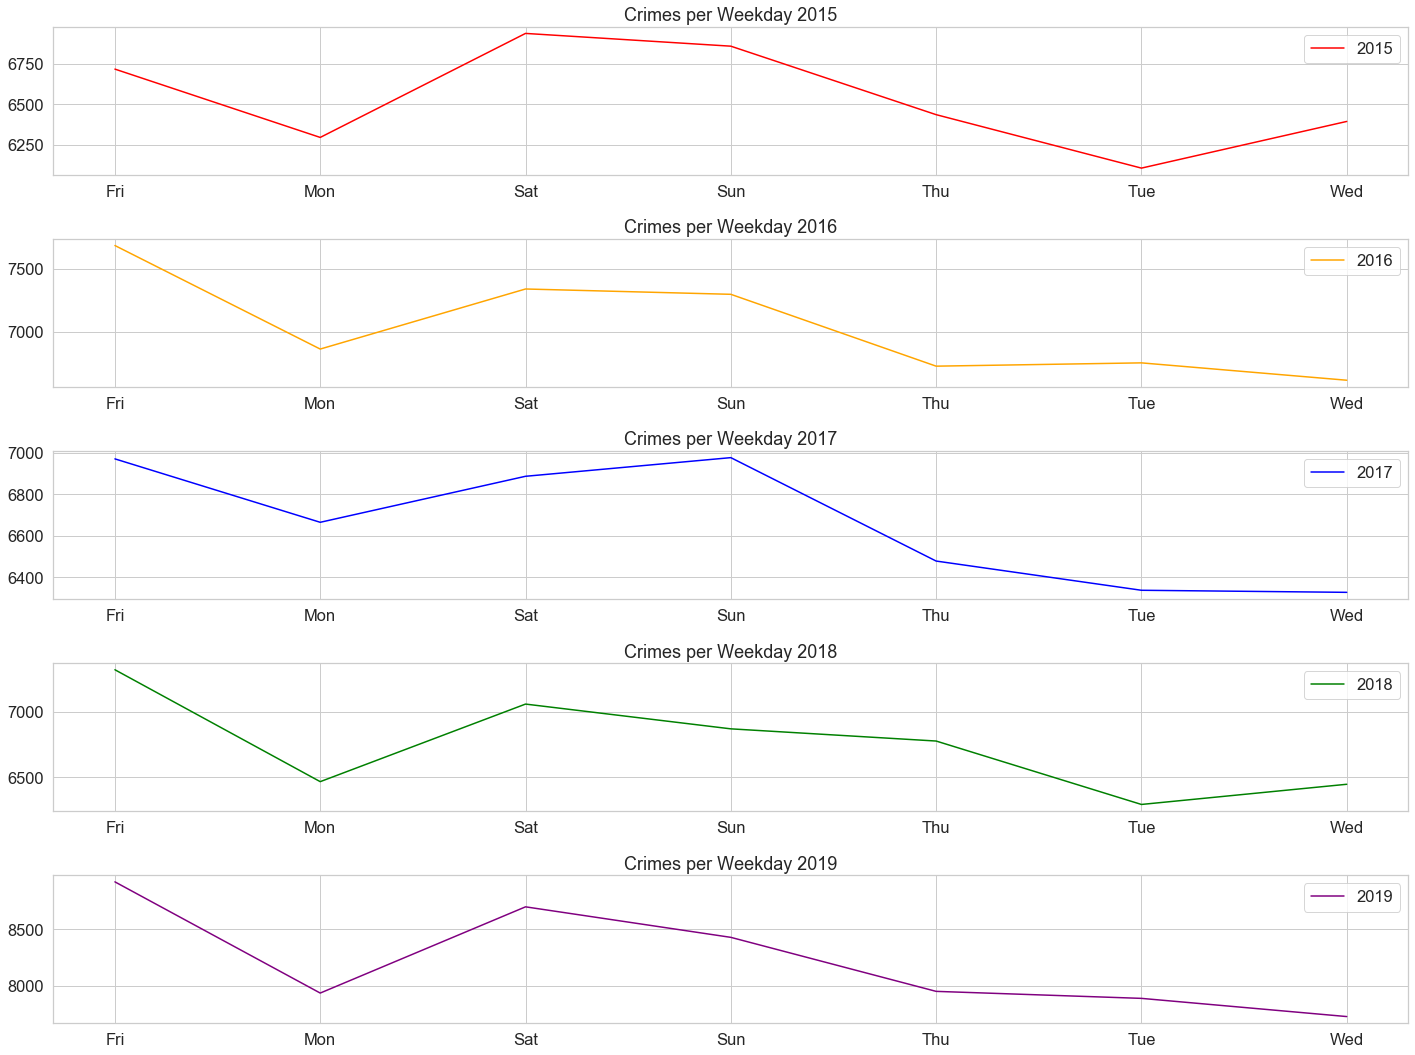

In [802]:
# Let's plot our yearly info about crimes by day of the week
plt.figure(figsize= (20,15))

plt.subplot(511)
plt.plot(total_weekday['2015'], color = 'red',  label = '2015')
plt.legend(loc = 'best')
plt.title('Crimes per Weekday 2015')

plt.subplot(512)
plt.plot(total_weekday['2016'], color = 'orange',  label = '2016')
plt.legend(loc = 'best')
plt.title('Crimes per Weekday 2016')

plt.subplot(513)
plt.plot(total_weekday['2017'], color = 'blue',  label = '2017')
plt.legend(loc = 'best')
plt.title('Crimes per Weekday 2017')

plt.subplot(514)
plt.plot(total_weekday['2018'], color = 'green',  label = '2018')
plt.legend(loc = 'best')
plt.title('Crimes per Weekday 2018')

plt.subplot(515)
plt.plot(total_weekday['2019'], color = 'purple',  label = '2019')
plt.legend(loc = 'best')
plt.title('Crimes per Weekday 2019')

plt.tight_layout()

**Takeaways:**

This, so far, is the one visualization where all of the lines by year behave in a similar manner! This means that there definately is a repeating and observable pattern for day of the week and crime counts!

### 5.3: Changes Over Time in  Crime Type Data

In [803]:
old_df.head()

,date_only,month,mnth_yr,day1_of_the_week,time_of_occurrence,day_of_the_year,temp_in_F,humidity,percip_inches,911_call_type,type_of_incident,division,sector,council_district,victim_type,victim_race,victim_ethnicity,victim_gender,victim_age,responding_officer_#1__badge_no,responding_officer_#1__name,responding_officer_#2_badge_no,responding_officer_#2__name,x_coordinate,y_cordinate,zip_code,total_pop,male,%_male,female,%_female,median_age,18_&_over,21_&_over,62_&_over,65_&_over,%_white,%_black,%_native,%_asian,%_hispanic,pop_over_16,%_pop_over_16,%_employed,%_unemployed,mean_household_income,%_families_poverty,%_all_people_poverty,year,zip_code.1
0,2015-01-01,1,January-2015,Thu,17:00,1,34,89,3e-02,11V - BURG MOTOR VEH,BMV,SOUTH CENTRAL,73,D8,Individual,White,Non-Hispanic or Latino,Male,50,8173,"JONES,REGINALD,LADUNNE",NaN,NaN,3e+06,7e+06,75241,50872,23984,46,26888,54,34,72,68,14,12,21,75,12,0e+00,20,3777,3777,49,6,42030,28,31,2015,75241
1,2015-01-01,1,January-2015,Thu,00:20,1,34,89,3e-02,31 - CRIMINAL MISCHIEF,CRIM MISCHIEF > OR EQUAL $50 BUT < $500,SOUTH CENTRAL,71,D4,Individual,Black,Non-Hispanic or Latino,Male,51,8133,"ADAMS,CORY,JAMES",NaN,NaN,2e+06,7e+06,75216,76015,35922,47,40093,53,35,72,68,16,13,30,65,3,1e-01,33,3142,3142,46,7,35651,34,39,2015,75216
2,2015-01-01,1,January-2015,Thu,08:00,1,34,89,3e-02,58 - ROUTINE INVESTIGATION,FRAUD USE/POSS IDENTIFYING INFO-PRELIMINARY IN...,CENTRAL,15,D2,Individual,Black,Non-Hispanic or Latino,Female,64,7341,"FREEMAN,DIANA,J",NaN,NaN,2e+06,7e+06,75215,22570,11298,49,11272,51,39,79,76,16,13,23,74,3,7e-01,17,2086,2086,45,6,36630,30,37,2015,75215
3,2015-01-01,1,January-2015,Thu,02:00,1,34,89,3e-02,40 - OTHER,ASSAULT -VERBAL THREAT,NORTHWEST,52,D6,Individual,Hispanic or Latino,Hispanic or Latino,Male,36,10767,"HOVIS,ALAN",5455,"AKON,FREDRICK,CHARLES",2e+06,7e+06,75220,69009,38379,53,30630,47,34,75,71,12,9,76,7,16,3e+00,48,4478,4478,63,5,104542,18,20,2015,75220
4,2015-01-01,1,January-2015,Thu,13:00,1,34,89,3e-02,31 - CRIMINAL MISCHIEF,CRIM MISCHIEF > OR EQUAL $50 BUT < $500,NORTHEAST,22,D9,Individual,Black,Non-Hispanic or Latino,Female,70,9654,"BANDAS,WAYI,ALIBEY",NaN,NaN,3e+06,7e+06,75228,106467,52189,49,54278,51,32,70,66,12,9,49,24,13,2e+00,49,3866,3866,61,7,51758,23,24,2015,75228


In [804]:
# What do our top 10 911 call types look like over time?
calls15 = pd.DataFrame(old_df.loc[old_df['year']== 2015])
calls15= calls15.loc[calls15['month']<= 9]
calls15 = pd.DataFrame(calls15['911_call_type'].value_counts())
calls15.reset_index(inplace = True)
calls15.rename(columns = {'index':'call_type', '911_call_type':'count'}, inplace = True)
calls15.sort_values(by = 'count', ascending = False, inplace = True)
calls15 = calls15.head(10)


calls16 = pd.DataFrame(old_df.loc[old_df['year']== 2016])
calls16= calls16.loc[calls16['month']<= 9]
calls16 = pd.DataFrame(calls16['911_call_type'].value_counts())
calls16.reset_index(inplace = True)
calls16.rename(columns = {'index':'call_type', '911_call_type':'count'}, inplace = True)
calls16.sort_values(by = 'count', ascending = False, inplace = True)
calls16 = calls16.head(10)

calls17 = pd.DataFrame(old_df.loc[old_df['year']== 2017])
calls17 = calls17.loc[calls17['month']<= 9]
calls17 = pd.DataFrame(calls17['911_call_type'].value_counts())
calls17.reset_index(inplace = True)
calls17.rename(columns = {'index':'call_type', '911_call_type':'count'}, inplace = True)
calls17.sort_values(by = 'count', ascending = False, inplace = True)
calls17 = calls17.head(10)

calls18 = pd.DataFrame(old_df.loc[old_df['year']== 2018])
calls18= calls18.loc[calls18['month']<= 9]
calls18 = pd.DataFrame(calls18['911_call_type'].value_counts())
calls18.reset_index(inplace = True)
calls18.rename(columns = {'index':'call_type', '911_call_type':'count'}, inplace = True)
calls18.sort_values(by = 'count', ascending = False, inplace = True)
calls18 = calls18.head(10)

calls19 = top_20.head(10)
calls19.rename(columns = {'type':'call_type'}, inplace = True)

C:\Users\gothv\Anaconda3\lib\site-packages\pandas\core\frame.py:4223: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)


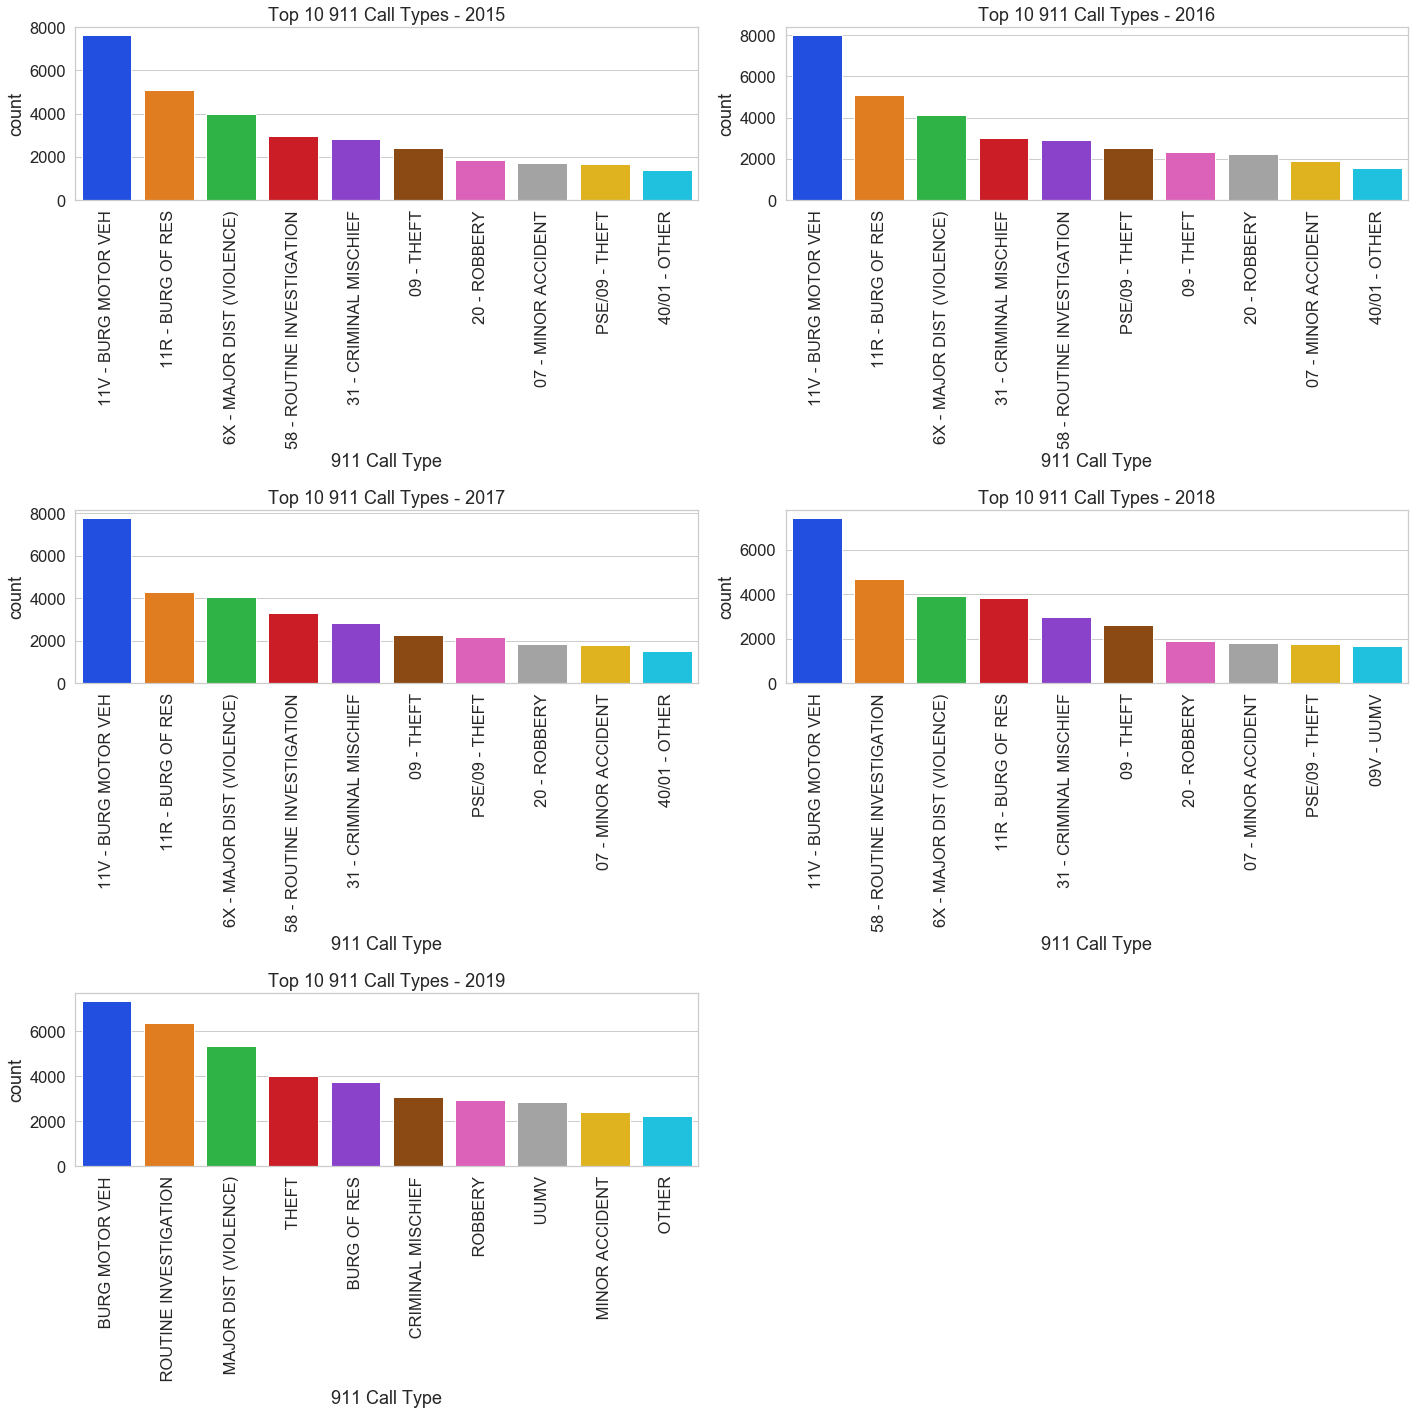

In [805]:
# What do our top crimes look like, over time?
plt.figure(figsize= (20,20))

plt.subplot(321)
sns.barplot(x= calls15['call_type'], y= calls15['count'],  data = calls15, palette= 'bright')
plt.title('Top 10 911 Call Types - 2015')
plt.xlabel('911 Call Type')
plt.xticks(rotation = 90)

plt.subplot(322)
sns.barplot(x= calls16['call_type'], y= calls16['count'],  data = calls16, palette= 'bright')
plt.title('Top 10 911 Call Types - 2016')
plt.xlabel('911 Call Type')
plt.xticks(rotation = 90)

plt.subplot(323)
sns.barplot(x= calls17['call_type'], y= calls17['count'],  data = calls17, palette= 'bright')
plt.title('Top 10 911 Call Types - 2017')
plt.xlabel('911 Call Type')
plt.xticks(rotation = 90)

plt.subplot(324)
sns.barplot(x= calls18['call_type'], y= calls18['count'],  data = calls18, palette= 'bright')
plt.title('Top 10 911 Call Types - 2018')
plt.xlabel('911 Call Type')
plt.xticks(rotation = 90)

plt.subplot(325)
sns.barplot(x= calls19['call_type'], y= calls19['count'],  data = calls19, palette= 'bright')
plt.title('Top 10 911 Call Types - 2019')
plt.xlabel('911 Call Type')
plt.xticks(rotation = 90)

plt.tight_layout()

**Main Takeaways:**

### 5.4: Changes Over Time in Weather Data

In [806]:
# How has our temperature changed over the scope of our project?
temp15 = pd.DataFrame(old_df.loc[old_df['year']== 2015])
temp15= temp15.loc[temp15['month']<= 9]
temp15= temp15[['date_only', 'temp_in_F']]
temp15= temp15.groupby('date_only').mean()
temp15.reset_index(inplace = True)
temp15['date_only'] = pd.to_datetime(temp15['date_only'])

temp16 = pd.DataFrame(old_df.loc[old_df['year']== 2016])
temp16= temp16.loc[temp16['month']<= 9]
temp16= temp16[['date_only', 'temp_in_F']]
temp16= temp16.groupby('date_only').mean()
temp16.reset_index(inplace = True)
temp16['date_only'] = pd.to_datetime(temp16['date_only'])

temp17 = pd.DataFrame(old_df.loc[old_df['year']== 2017])
temp17= temp17.loc[temp17['month']<= 9]
temp17= temp17[['date_only', 'temp_in_F']]
temp17= temp17.groupby('date_only').mean()
temp17.reset_index(inplace = True)
temp17['date_only'] = pd.to_datetime(temp17['date_only'])

temp18 = pd.DataFrame(old_df.loc[old_df['year']== 2018])
temp18= temp18.loc[temp18['month']<= 9]
temp18= temp18[['date_only', 'temp_in_F']]
temp18= temp18.groupby('date_only').mean()
temp18.reset_index(inplace = True)
temp18['date_only'] = pd.to_datetime(temp18['date_only'])


temp19 = weather[['date_only', 'temp_in_F']]

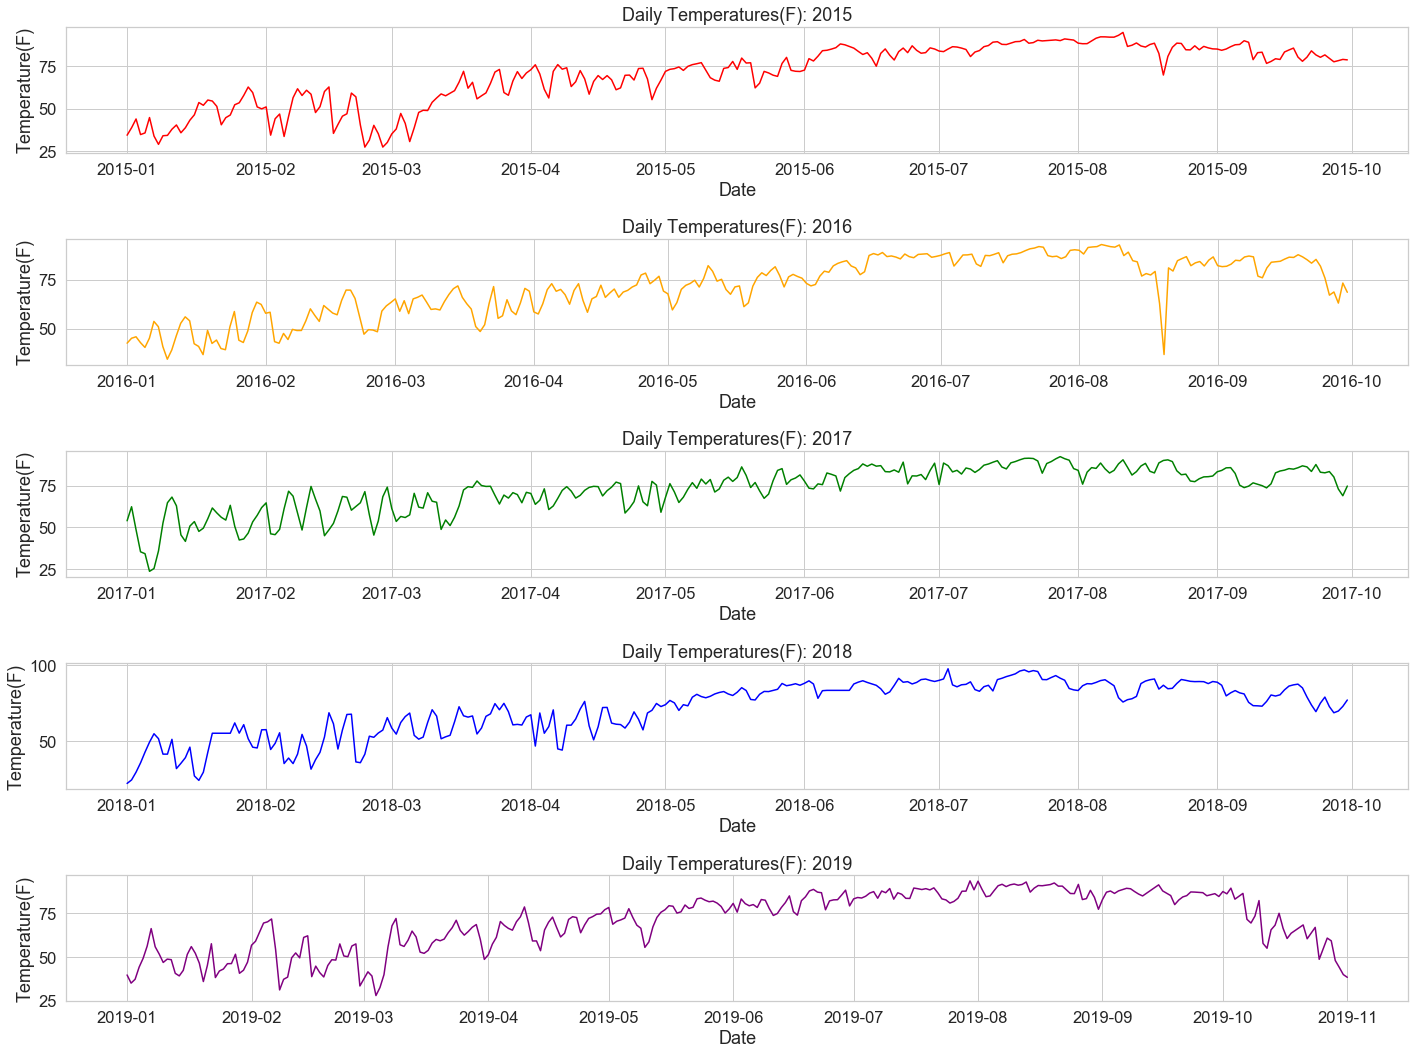

In [807]:
# What does our temperatures over time look like visually?
# Let's plot our yearly info about crimes by day of the week
plt.figure(figsize= (20,15))

plt.subplot(511)
sns.lineplot(x= temp15['date_only'],y = temp15['temp_in_F'], data = temp15, color = 'red')
plt.title('Daily Temperatures(F): 2015')
plt.xlabel('Date')
plt.ylabel('Temperature(F)') 


plt.subplot(512)
sns.lineplot(x= temp16['date_only'],y = temp16['temp_in_F'], data = temp16, color = 'orange')
plt.title('Daily Temperatures(F): 2016')
plt.xlabel('Date')
plt.ylabel('Temperature(F)')


plt.subplot(513)
sns.lineplot(x= temp17['date_only'],y = temp17['temp_in_F'], data = temp17, color = 'green')
plt.title('Daily Temperatures(F): 2017')
plt.xlabel('Date')
plt.ylabel('Temperature(F)')


plt.subplot(514)
sns.lineplot(x= temp18['date_only'],y = temp18['temp_in_F'], data = temp18, color = 'blue')
plt.title('Daily Temperatures(F): 2018')
plt.xlabel('Date')
plt.ylabel('Temperature(F)')


plt.subplot(515)
sns.lineplot(x= temp19['date_only'],y = temp19['temp_in_F'], data = temp19, color = 'purple')
plt.title('Daily Temperatures(F): 2019')
plt.xlabel('Date')
plt.ylabel('Temperature(F)')

plt.tight_layout()

**Main Takeaways:**
- Overall the main trend and seasonality of our temperatures look pretty similar over the years
- 2019 has experienced the most ups and downs for temperature early in the year
- 2019 has also had the most downturn of temperatures towards October as well


Now that we have our data cleaned, comparisons made, and are ready to export our 2019 data we can move on to other parts of our project!

### 6. Final Export of Our 2019 Data
[Back to Outline](#Project-Outline:-2019-Crime-and-Weather-Info)

In [808]:
# Saving this bad boy as a csv for later use
df2019.to_csv('df2019.csv')

Want to know what I did with this data? Check out the project page [here](https://steelealloy.github.io/final_capstone/)